In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Masters thesis Notebook 1: Using time series to predict covid 19 vaccination rates in Ireland

## Section 1: Initial data exploration

In [200]:
df = pd.read_csv("COVID-19_HSE_Daily_Vaccination_Figures.csv")

In [201]:
df

,X,Y,VaccinationDate,VaccineText,Dose1,Dose2,SingleDose,Dose1Cum,Dose2Cum,SingleDoseCum,PartiallyVacc,FullyVacc,PartialPercent,FullyPercent,ObjectId
0,-856336.3149,7036491.651,2022/07/10 23:00:00+00,Mon 11 Jul 2022,11,16,0,3857139,3810721,241196,4098335,4051917,85.408331,84.440991,1
1,-856336.3149,7036491.651,2020/12/28 00:00:00+00,Mon 28 Dec 2020,297,23,4,297,23,4,301,27,0.006273,0.000563,2
2,-856336.3149,7036491.651,2021/11/29 00:00:00+00,Mon 29 Nov 2021,537,1005,2,3665034,3602273,241086,3906120,3843359,81.402616,80.094692,3
3,-856336.3149,7036491.651,2022/07/11 23:00:00+00,Tue 12 Jul 2022,44,81,0,3857183,3810802,241196,4098379,4051998,85.409248,84.442679,4
4,-856336.3149,7036491.651,2020/12/29 00:00:00+00,Tue 29 Dec 2020,81,3,0,378,26,4,382,30,0.007961,0.000625,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-856336.3149,7036491.651,2022/07/05 23:00:00+00,Wed 06 Jul 2022,60,83,0,3856699,3810174,241196,4097895,4051370,85.399162,84.429592,780
780,-856336.3149,7036491.651,2022/07/06 23:00:00+00,Thu 07 Jul 2022,77,77,0,3856776,3810251,241196,4097972,4051447,85.400766,84.431196,781
781,-856336.3149,7036491.651,2022/07/07 23:00:00+00,Fri 08 Jul 2022,99,91,0,3856875,3810342,241196,4098071,4051538,85.402829,84.433093,782
782,-856336.3149,7036491.651,2022/07/08 23:00:00+00,Sat 09 Jul 2022,119,144,0,3856994,3810486,241196,4098190,4051682,85.405309,84.436094,783


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'Dose1'}>,
        <Axes: title={'center': 'Dose2'}>],
       [<Axes: title={'center': 'SingleDose'}>,
        <Axes: title={'center': 'Dose1Cum'}>,
        <Axes: title={'center': 'Dose2Cum'}>,
        <Axes: title={'center': 'SingleDoseCum'}>],
       [<Axes: title={'center': 'PartiallyVacc'}>,
        <Axes: title={'center': 'FullyVacc'}>,
        <Axes: title={'center': 'PartialPercent'}>,
        <Axes: title={'center': 'FullyPercent'}>],
       [<Axes: title={'center': 'ObjectId'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

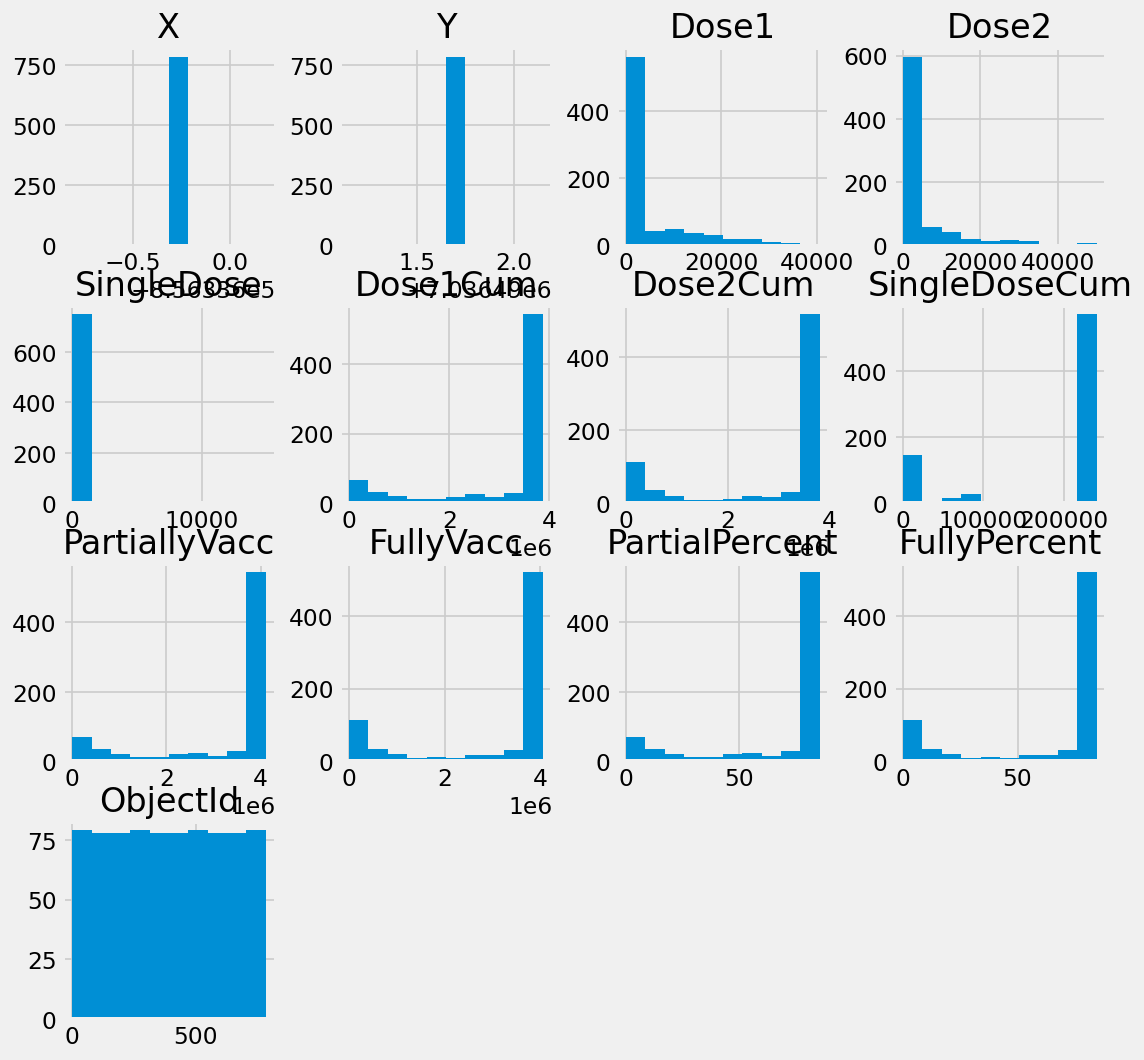

In [202]:
df.hist(figsize = (10,10))

In [203]:
df.dtypes

X                  float64
Y                  float64
VaccinationDate     object
VaccineText         object
Dose1                int64
Dose2                int64
SingleDose           int64
Dose1Cum             int64
Dose2Cum             int64
SingleDoseCum        int64
PartiallyVacc        int64
FullyVacc            int64
PartialPercent     float64
FullyPercent       float64
ObjectId             int64
dtype: object

In [204]:
df['VaccinationDate'] = pd.to_datetime(df['VaccinationDate'])

In [205]:
df.describe()

,X,Y,Dose1,Dose2,SingleDose,Dose1Cum,Dose2Cum,SingleDoseCum,PartiallyVacc,FullyVacc,PartialPercent,FullyPercent,ObjectId
count,7.840000e+02,7.840000e+02,784.000000,784.000000,784.000000,7.840000e+02,7.840000e+02,784.000000,7.840000e+02,7.840000e+02,784.000000,784.000000,784.000000
mean,-8.563363e+05,7.036492e+06,4932.389031,4871.732143,307.664541,3.063717e+06,2.862487e+06,183974.614796,3.247692e+06,3.046462e+06,67.681127,63.487541,392.500000
std,2.446282e-09,2.050218e-08,8405.263864,9356.614310,1367.166368,1.273884e+06,1.412759e+06,96857.934500,1.368277e+06,1.508562e+06,28.514577,31.438079,226.465597
min,-8.563363e+05,7.036492e+06,1.000000,0.000000,0.000000,2.970000e+02,2.300000e+01,4.000000,3.010000e+02,2.700000e+01,0.006273,0.000563,1.000000
25%,-8.563363e+05,7.036492e+06,58.000000,42.750000,0.000000,2.739961e+06,2.192091e+06,123827.250000,2.863788e+06,2.315918e+06,59.680664,48.263183,196.750000
50%,-8.563363e+05,7.036492e+06,689.500000,693.500000,0.000000,3.801228e+06,3.659248e+06,241153.000000,4.042381e+06,3.900402e+06,84.242263,81.283444,392.500000
75%,-8.563363e+05,7.036492e+06,6672.500000,4094.000000,6.000000,3.858865e+06,3.813037e+06,241199.000000,4.100064e+06,4.054236e+06,85.444358,84.489318,588.250000
max,-8.563363e+05,7.036492e+06,40618.000000,50146.000000,14937.000000,3.866993e+06,3.819438e+06,241209.000000,4.108202e+06,4.060647e+06,85.613957,84.622922,784.000000


In [206]:
df.dtypes

X                              float64
Y                              float64
VaccinationDate    datetime64[ns, UTC]
VaccineText                     object
Dose1                            int64
Dose2                            int64
SingleDose                       int64
Dose1Cum                         int64
Dose2Cum                         int64
SingleDoseCum                    int64
PartiallyVacc                    int64
FullyVacc                        int64
PartialPercent                 float64
FullyPercent                   float64
ObjectId                         int64
dtype: object

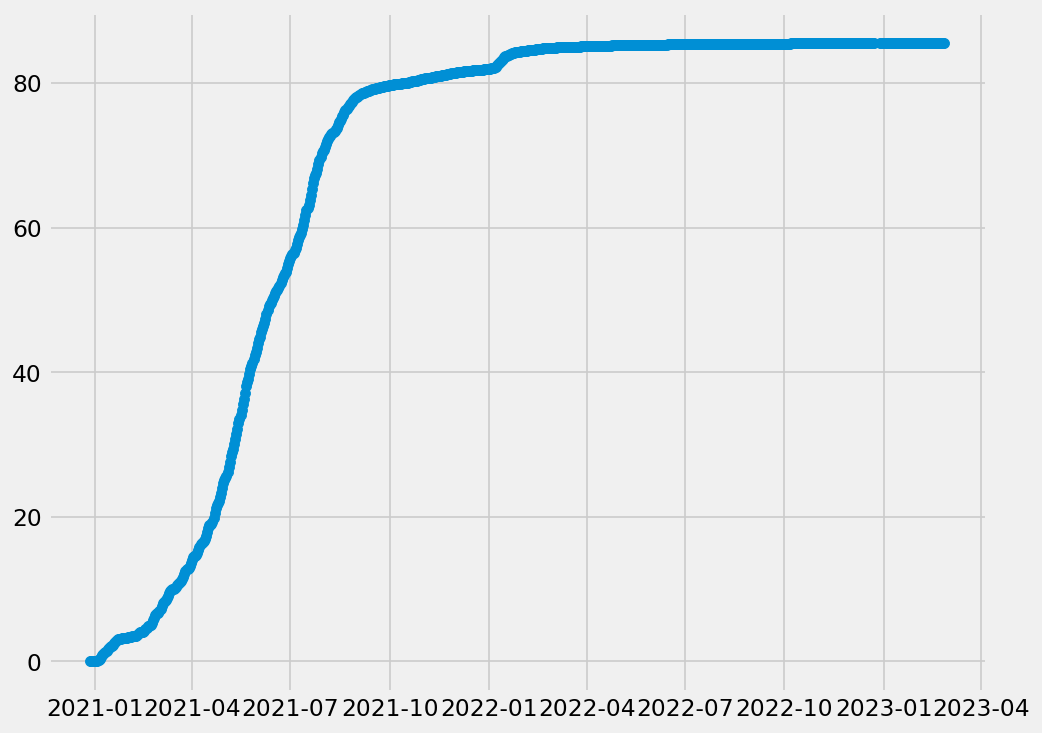

In [207]:
plt.scatter(df['VaccinationDate'], df['PartialPercent'])

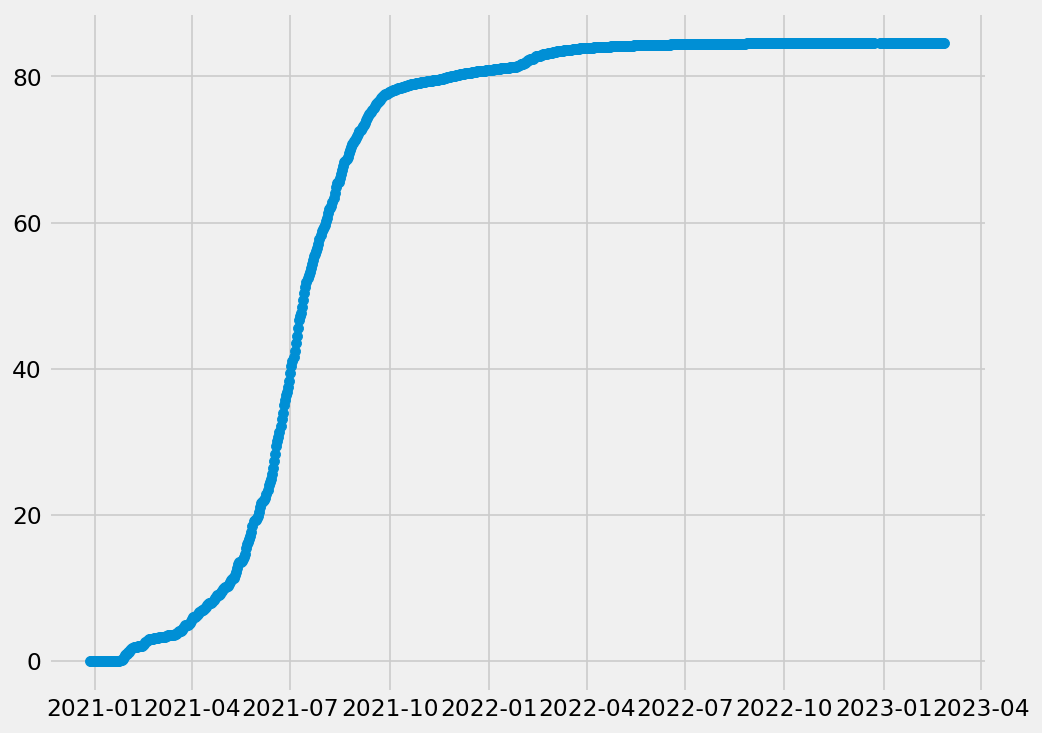

In [208]:
plt.scatter(df['VaccinationDate'], df['FullyPercent'])

In [209]:
df.isnull().any()

X                  False
Y                  False
VaccinationDate    False
VaccineText        False
Dose1              False
Dose2              False
SingleDose         False
Dose1Cum           False
Dose2Cum           False
SingleDoseCum      False
PartiallyVacc      False
FullyVacc          False
PartialPercent     False
FullyPercent       False
ObjectId           False
dtype: bool

In [210]:
df.duplicated().any()

False

(array([ 71.,  36.,  20.,  13.,  13.,  20.,  24.,  14.,  29., 544.]),
 array([6.27276900e-03, 8.56704121e+00, 1.71278096e+01, 2.56885781e+01,
        3.42493465e+01, 4.28101150e+01, 5.13708834e+01, 5.99316518e+01,
        6.84924203e+01, 7.70531887e+01, 8.56139571e+01]),
 <BarContainer object of 10 artists>)

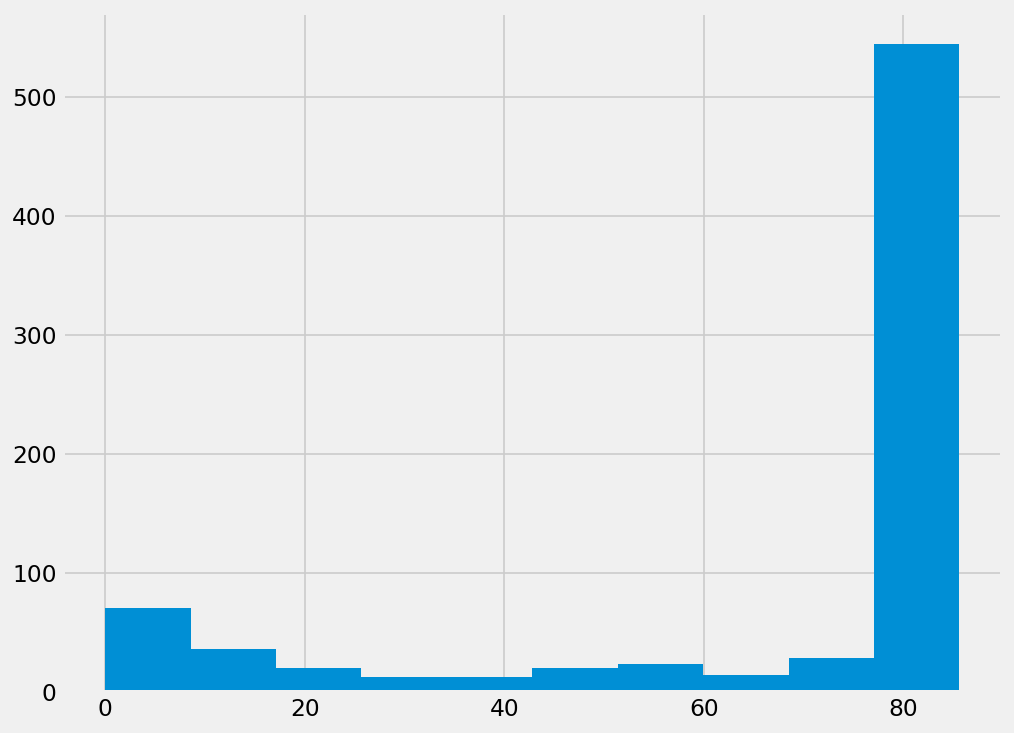

In [211]:
plt.hist(df['PartialPercent'])

In [212]:
df1 = df.sort_values(by='VaccinationDate')

In [213]:
df1

,X,Y,VaccinationDate,VaccineText,Dose1,Dose2,SingleDose,Dose1Cum,Dose2Cum,SingleDoseCum,PartiallyVacc,FullyVacc,PartialPercent,FullyPercent,ObjectId
1,-856336.3149,7036491.651,2020-12-28 00:00:00+00:00,Mon 28 Dec 2020,297,23,4,297,23,4,301,27,0.006273,0.000563,2
4,-856336.3149,7036491.651,2020-12-29 00:00:00+00:00,Tue 29 Dec 2020,81,3,0,378,26,4,382,30,0.007961,0.000625,5
7,-856336.3149,7036491.651,2020-12-30 00:00:00+00:00,Wed 30 Dec 2020,1066,2,0,1444,28,4,1448,32,0.030176,0.000667,8
10,-856336.3149,7036491.651,2020-12-31 00:00:00+00:00,Thu 31 Dec 2020,1042,1,0,2486,29,4,2490,33,0.051891,0.000688,11
13,-856336.3149,7036491.651,2021-01-01 00:00:00+00:00,Fri 01 Jan 2021,824,0,0,3310,29,4,3314,33,0.069063,0.000688,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,-856336.3149,7036491.651,2023-02-22 00:00:00+00:00,Wed 22 Feb 2023,24,16,0,3866832,3819359,241209,4108041,4060568,85.610602,84.621276,668
668,-856336.3149,7036491.651,2023-02-23 00:00:00+00:00,Thu 23 Feb 2023,21,10,0,3866853,3819369,241209,4108062,4060578,85.611040,84.621484,669
669,-856336.3149,7036491.651,2023-02-24 00:00:00+00:00,Fri 24 Feb 2023,13,12,0,3866866,3819381,241209,4108075,4060590,85.611310,84.621734,670
670,-856336.3149,7036491.651,2023-02-25 00:00:00+00:00,Sat 25 Feb 2023,49,19,0,3866915,3819400,241209,4108124,4060609,85.612332,84.622130,671


In [214]:
import plotly.express as px

In [215]:
px.scatter(x=df1['VaccinationDate'], y=df1['FullyPercent'])
#px.scatter(x=df1['VaccinationDate'], y=df1['FullyPercent'])

In [216]:
df2 = df1[(df1['VaccinationDate'] > "2020-12-28") & (df1['VaccinationDate'] < "2021-09-05")]

In [217]:
px.scatter(x=df2['VaccinationDate'], y=df2['FullyPercent'])
#px.scatter(x=df1['VaccinationDate'], y=df1['FullyPercent'])

In [218]:
df2.shape

(251, 15)

In [219]:
df1.shape

(784, 15)

## Section 2: Application of LSTM to covid-19 vaccination percentage

# -------------------------------------------------------------------------------------------

In [141]:
data =df2.filter(['FullyPercent'])

In [142]:
dataset = data.values

In [143]:
dataset

array([[6.25193000e-04],
       [6.66872000e-04],
       [6.87712000e-04],
       [6.87712000e-04],
       [6.87712000e-04],
       [7.71071000e-04],
       [8.75270000e-04],
       [1.16702700e-03],
       [1.45878300e-03],
       [1.64634100e-03],
       [1.81305900e-03],
       [1.95893800e-03],
       [2.10481600e-03],
       [2.27153400e-03],
       [2.58413100e-03],
       [2.68832900e-03],
       [2.81336800e-03],
       [2.91756700e-03],
       [2.98008600e-03],
       [3.08428500e-03],
       [3.29268300e-03],
       [3.73031800e-03],
       [2.38615290e-02],
       [4.40135800e-02],
       [6.42698300e-02],
       [7.38769610e-02],
       [8.22128660e-02],
       [1.09179520e-01],
       [1.82285409e-01],
       [3.22141061e-01],
       [5.62736128e-01],
       [8.02935239e-01],
       [9.65381194e-01],
       [1.05057415e+00],
       [1.22433609e+00],
       [1.33091064e+00],
       [1.47414233e+00],
       [1.69385596e+00],
       [1.87341136e+00],
       [1.95408208e+00],


In [144]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
import time
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [145]:
training_data_len = math.ceil( len(dataset) * .8 )

In [146]:
training_data_len 

201

In [147]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [148]:
dataset

array([[0.00000000e+00],
       [5.71241330e-07],
       [8.56868848e-07],
       [8.56868848e-07],
       [8.56868848e-07],
       [1.99936521e-06],
       [3.42748910e-06],
       [7.42623323e-06],
       [1.14249637e-05],
       [1.39955839e-05],
       [1.62805766e-05],
       [1.82799556e-05],
       [2.02793208e-05],
       [2.25643135e-05],
       [2.68486852e-05],
       [2.82767953e-05],
       [2.99905467e-05],
       [3.14186706e-05],
       [3.22755395e-05],
       [3.37036633e-05],
       [3.65599111e-05],
       [4.25580205e-05],
       [3.18471064e-04],
       [5.94669735e-04],
       [8.72296530e-04],
       [1.00396932e-03],
       [1.11821903e-03],
       [1.48781684e-03],
       [2.48978678e-03],
       [4.40661129e-03],
       [7.70414353e-03],
       [1.09962489e-02],
       [1.32226901e-02],
       [1.43903221e-02],
       [1.67718573e-02],
       [1.82325399e-02],
       [2.01956355e-02],
       [2.32069722e-02],
       [2.56679109e-02],
       [2.67735625e-02],


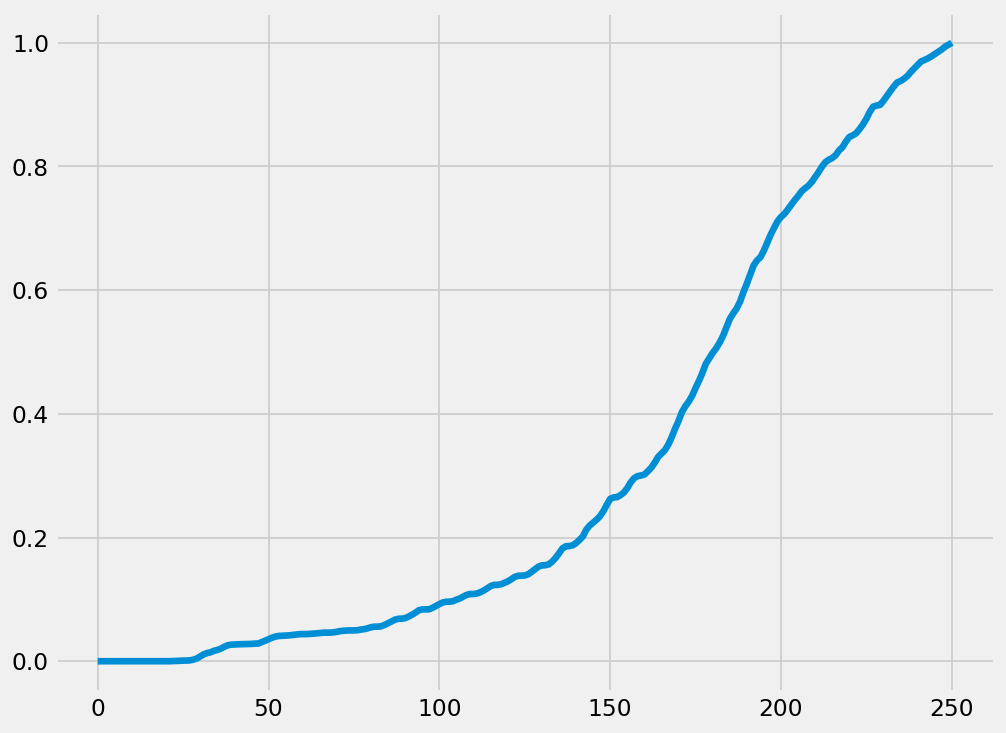

In [149]:
plt.plot(dataset)

In [150]:
train_data = dataset[0:training_data_len , :]

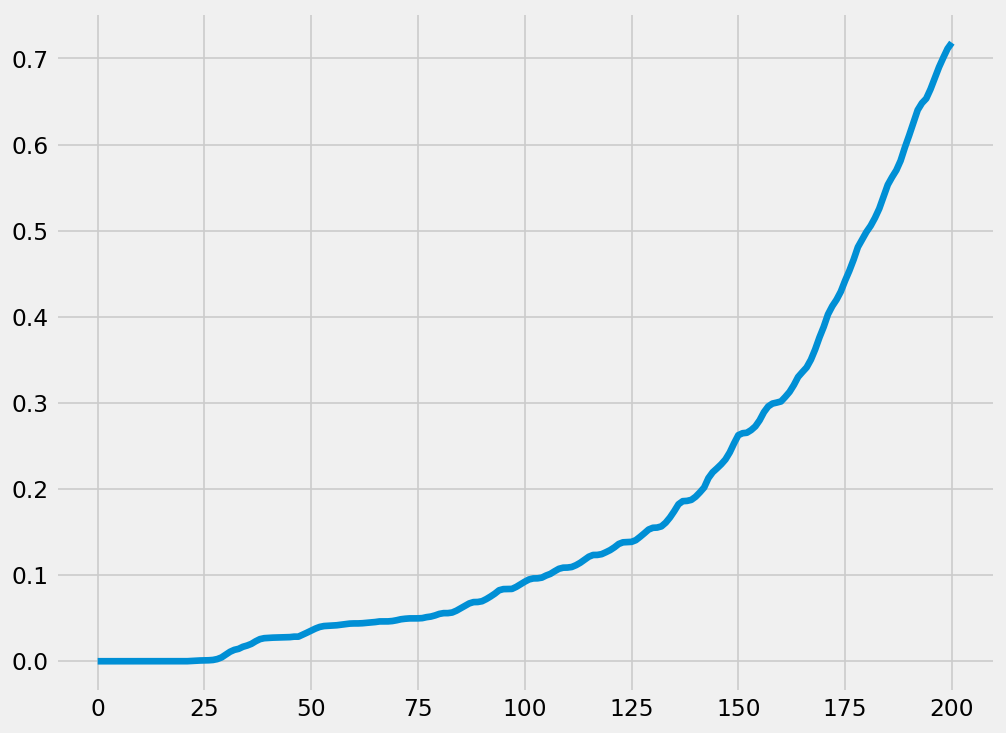

In [151]:
plt.plot(train_data)

In [152]:
x_train =[]
y_train =[]

In [153]:
for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train.append(train_data[i,0])

In [155]:
y_train

[1.628057663717971e-05,
 1.827995555639715e-05,
 2.0279320769879558e-05,
 2.256431350121233e-05,
 2.6848685151762532e-05,
 2.8276795329544246e-05,
 2.9990546730911333e-05,
 3.141867061442806e-05,
 3.2275539462244093e-05,
 3.3703663345760834e-05,
 3.6559911112794294e-05,
 4.255802045897656e-05,
 0.0003184710640890958,
 0.0005946697352370654,
 0.0008722965302685518,
 0.0010039693220724461,
 0.0011182190271677595,
 0.0014878168413111975,
 0.0024897867844644265,
 0.0044066112920509186,
 0.007704143527859407,
 0.010996248895651681,
 0.013222690110214054,
 0.014390322136034788,
 0.016771857324750086,
 0.01823253985339167,
 0.020195635484346254,
 0.023206972195527892,
 0.02566791094333281,
 0.026773562496772502,
 0.02714544530364727,
 0.027397651537410514,
 0.027557315510731838,
 0.027724691331094974,
 0.027853793502649687,
 0.028004603118857795,
 0.028552716103208916,
 0.028560999205286434,
 0.030816859711544017,
 0.03315041002548985,
 0.0355687907528358,
 0.03795746654726294,
 0.03984144424

In [156]:
df2

,X,Y,VaccinationDate,VaccineText,Dose1,Dose2,SingleDose,Dose1Cum,Dose2Cum,SingleDoseCum,PartiallyVacc,FullyVacc,PartialPercent,FullyPercent,ObjectId
4,-856336.3149,7036491.651,2020-12-29 00:00:00+00:00,Tue 29 Dec 2020,81,3,0,378,26,4,382,30,0.007961,0.000625,5
7,-856336.3149,7036491.651,2020-12-30 00:00:00+00:00,Wed 30 Dec 2020,1066,2,0,1444,28,4,1448,32,0.030176,0.000667,8
10,-856336.3149,7036491.651,2020-12-31 00:00:00+00:00,Thu 31 Dec 2020,1042,1,0,2486,29,4,2490,33,0.051891,0.000688,11
13,-856336.3149,7036491.651,2021-01-01 00:00:00+00:00,Fri 01 Jan 2021,824,0,0,3310,29,4,3314,33,0.069063,0.000688,14
16,-856336.3149,7036491.651,2021-01-02 00:00:00+00:00,Sat 02 Jan 2021,1021,0,0,4331,29,4,4335,33,0.090340,0.000688,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,-856336.3149,7036491.651,2021-08-31 23:00:00+00:00,Wed 01 Sep 2021,5006,12577,184,3512779,3211652,237899,3750678,3449551,78.163242,71.887826,473
473,-856336.3149,7036491.651,2021-09-01 23:00:00+00:00,Thu 02 Sep 2021,5016,12393,249,3517795,3224045,238148,3755943,3462193,78.272963,72.151283,474
474,-856336.3149,7036491.651,2021-09-02 23:00:00+00:00,Fri 03 Sep 2021,4790,16123,167,3522585,3240168,238315,3760900,3478483,78.376266,72.490762,475
475,-856336.3149,7036491.651,2021-09-03 23:00:00+00:00,Sat 04 Sep 2021,4634,10599,136,3527219,3250767,238451,3765670,3489218,78.475671,72.714477,476


In [157]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [158]:
x_train =np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(191, 10, 1)

In [159]:
from keras.layers import Bidirectional
from keras.layers import LSTM,Dense ,Dropout
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Flatten, LSTM, Bidirectional, Input, Dropout, InputLayer, BatchNormalization

In [160]:
model = Sequential()
model.add(LSTM(20, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(20, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Dense(1))

In [161]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [162]:
x_train.shape

(191, 10, 1)

In [163]:
y_train.shape

(191,)

In [164]:
model.fit(x_train, y_train, batch_size = 5, epochs = 20)

Epoch 1/20
39/39 [==============================] - 3s 7ms/step - loss: 0.0239 - accuracy: 0.0000e+00
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 8/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 9/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 10/20
39/39 [==============================] - 0s 6ms/step - loss: 9.0502e-0

In [ ]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
# Mean square error
print_error(y_train, y_test, train_predict, test_predict)

In [165]:
test_data = dataset[training_data_len -10: , :]

In [166]:
test_data

array([[0.62530694],
       [0.64006143],
       [0.6481346 ],
       [0.65335838],
       [0.66417897],
       [0.67705777],
       [0.68993372],
       [0.70091825],
       [0.71137924],
       [0.71827393],
       [0.72335118],
       [0.73041324],
       [0.73781377],
       [0.74545736],
       [0.75199559],
       [0.75956063],
       [0.76444823],
       [0.76864891],
       [0.77486466],
       [0.78275075],
       [0.79091589],
       [0.79973111],
       [0.80690028],
       [0.81073336],
       [0.8135142 ],
       [0.818227  ],
       [0.82581946],
       [0.83122347],
       [0.8402215 ],
       [0.84756861],
       [0.85016036],
       [0.85363298],
       [0.86039057],
       [0.86803416],
       [0.877153  ],
       [0.88834547],
       [0.89666457],
       [0.8984203 ],
       [0.89950481],
       [0.90623669],
       [0.91406851],
       [0.92162527],
       [0.92913433],
       [0.93569798],
       [0.93805381],
       [0.94160383],
       [0.94609213],
       [0.952

In [167]:
x_test = []
y_test = dataset[training_data_len:, :]

In [168]:
for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i, 0])

In [169]:
x_test = np.array(x_test)

In [170]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [171]:
predictions = model.predict(x_test)

2/2 [==============================] - 1s 4ms/step


In [172]:
predictions = scaler.inverse_transform(predictions)

In [173]:
rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test),predictions))
r2_value = r2_score(scaler.inverse_transform(y_test),predictions)

In [174]:
print("Root Mean Square Error: ", rmse)
print("R^2 Value: ", r2_value)

Root Mean Square Error:  1.0608243123475154
R^2 Value:  0.9701026658672178


In [175]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/var/folders/yy/l_574phs7hb1lhs37q6r9mwm0000gn/T/ipykernel_36658/2657761684.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [181]:
train_data_inv_trans = scaler.inverse_transform(train_data)

In [187]:
valid[['FullyPercent']].index

Int64Index([427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
            440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
            453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
            466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476],
           dtype='int64')

In [192]:
valid.index = pd.RangeIndex(start=201, stop=201+len(valid[['FullyPercent']]), step=1)

In [193]:
valid[['FullyPercent']]

,FullyPercent
201,52.777888
202,53.293151
203,53.833110
204,54.390803
205,54.867846
206,55.419808
207,55.776418
208,56.082908
209,56.536423
210,57.111809


In [196]:
valid[['Predictions']]

,Predictions
201,52.172318
202,52.874516
203,53.520256
204,54.149178
205,54.776585
206,55.366745
207,55.912216
208,56.409988
209,56.867245
210,57.291126


In [197]:
valid[['Predictions']].index = pd.RangeIndex(start=201, stop=201+len(valid[['Predictions']]), step=1)

In [220]:
valid[['Predictions']]

,Predictions
201,52.172318
202,52.874516
203,53.520256
204,54.149178
205,54.776585
206,55.366745
207,55.912216
208,56.409988
209,56.867245
210,57.291126


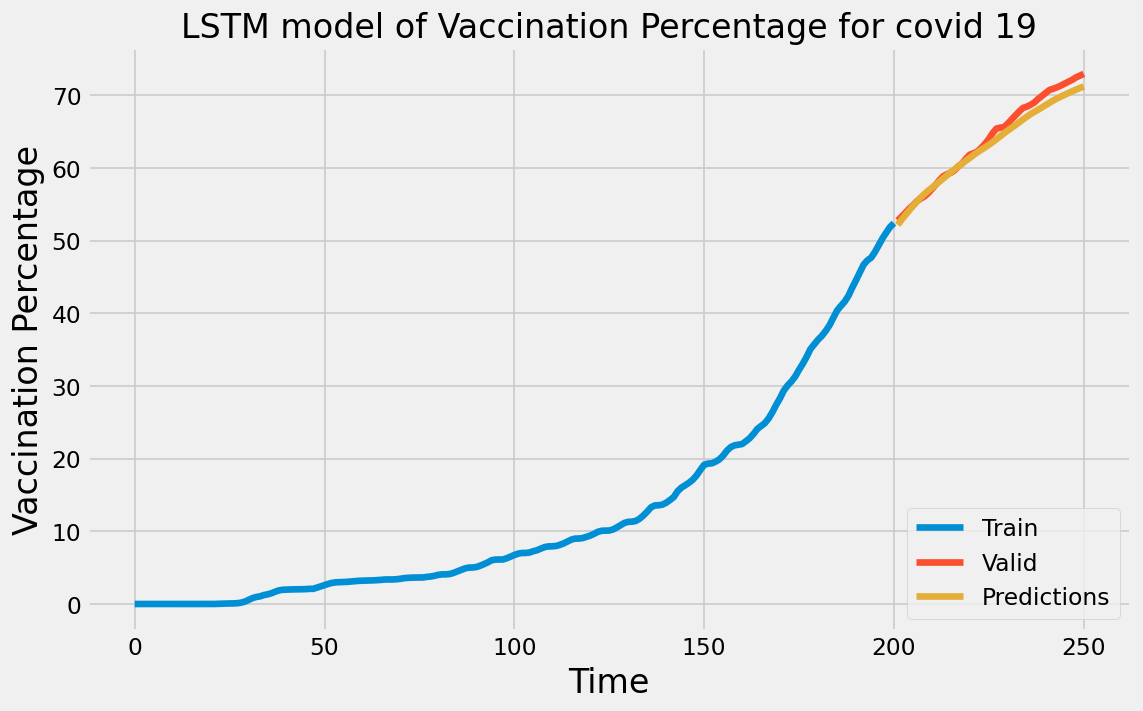

In [221]:
overall =plt.figure(figsize=(10,6))
plt.title('LSTM model of Vaccination Percentage for covid 19',fontsize=20 )
plt.xlabel('Time',fontsize=20)
plt.ylabel('Vaccination Percentage', fontsize=20)

plt.plot(train_data_inv_trans)
plt.plot(valid[['FullyPercent', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc = 'lower right')
plt.show()

## Section 3: Application of Simple RNN to covid-19 vaccincation data


# -------------------------------------------------------------------------------------------

In [222]:
from keras.layers import Dense, SimpleRNN

In [223]:
model = Sequential()
model.add(SimpleRNN(100, input_shape=(x_train.shape[1], 1), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
    
 
model.fit(x_train, y_train, batch_size = 5, epochs=20)

Epoch 1/20
39/39 [==============================] - 1s 2ms/step - loss: 0.0140
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 3.9927e-04
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 1.6729e-05
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 1.7942e-05
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 2.9058e-05
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 2.3891e-05
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 1.7814e-05
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 3.1615e-05
Epoch 9/20
39/39 [==============================] - 0s 2ms/step - loss: 8.1115e-05
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 5.9123e-05
Epoch 11/20
39/39 [==============================] - 0s 2ms/step - loss: 2.5405e-05
Epoch 12/20
39/39 [==============================] - 0s 3ms/step - loss: 1.8050e-05
Epoch

In [224]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
# Mean square error
print_error(y_train, y_test, train_predict, test_predict)

2/2 [==============================] - 0s 2ms/step
Train RMSE: 0.003 RMSE
Test RMSE: 0.010 RMSE


In [225]:
test_data = dataset[training_data_len -30: , :]

In [226]:
x_test = []
y_test = dataset[training_data_len:, :]

In [227]:
  for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [228]:
x_test = np.array(x_test)

In [229]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [230]:
predictions = model.predict(x_test)

2/2 [==============================] - 0s 7ms/step


In [231]:
predictions = scaler.inverse_transform(predictions)

In [232]:
rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test),predictions))
r2_value = r2_score(scaler.inverse_transform(y_test),predictions)

In [233]:
print("Root Mean Square Error: ", rmse)
print("R^2 Value: ", r2_value)

Root Mean Square Error:  0.20746585655665145
R^2 Value:  0.9988564930643792


In [234]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/var/folders/yy/l_574phs7hb1lhs37q6r9mwm0000gn/T/ipykernel_36658/2657761684.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [235]:
valid.index = pd.RangeIndex(start=201, stop=201+len(valid[['FullyPercent']]), step=1)

In [236]:
valid[['Predictions']].index = pd.RangeIndex(start=201, stop=201+len(valid[['Predictions']]), step=1)

In [239]:
train_data_inv_trans = scaler.inverse_transform(train_data)

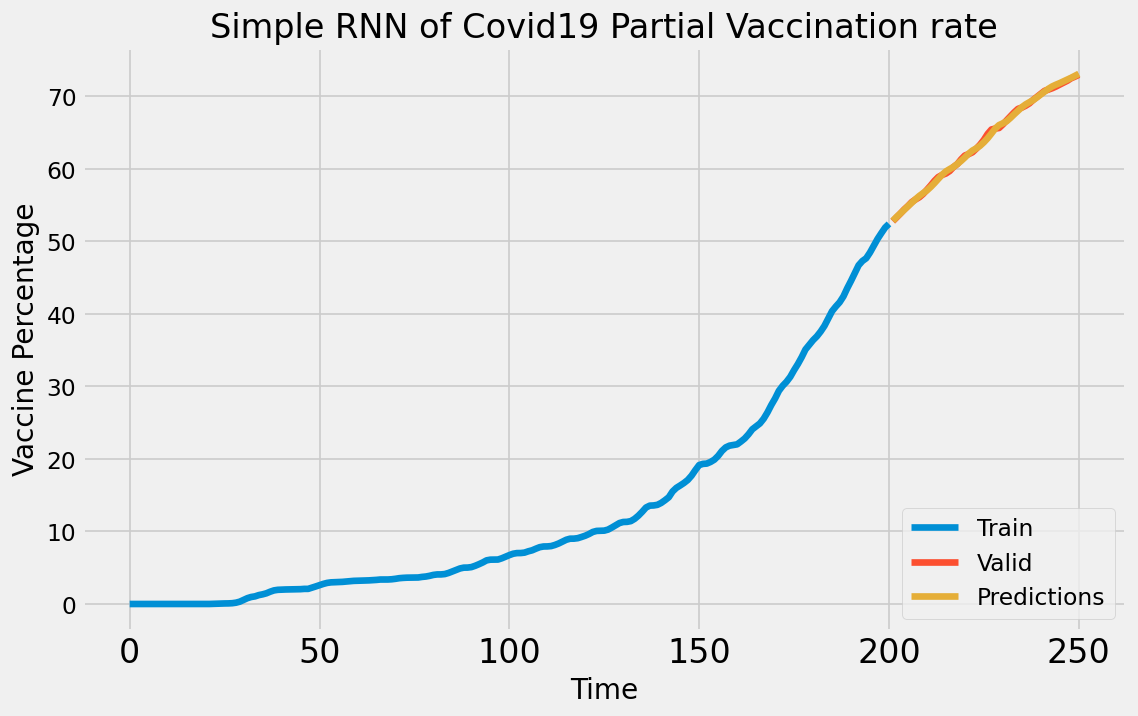

In [247]:
plt.figure(figsize=(10,6))
plt.title('Simple RNN of Covid19 Partial Vaccination rate' )
plt.xlabel('Time')
plt.ylabel('Vaccine Percentage')
plt.xticks(fontsize=20)
plt.xticks(fontsize=20)
plt.plot(train_data_inv_trans)
plt.plot(valid[['FullyPercent', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc = 'lower right')
plt.show()

## Section 4: Application of ARIMA to covid-19 vaccination percentage

# -------------------------------------------------------------------------------------------

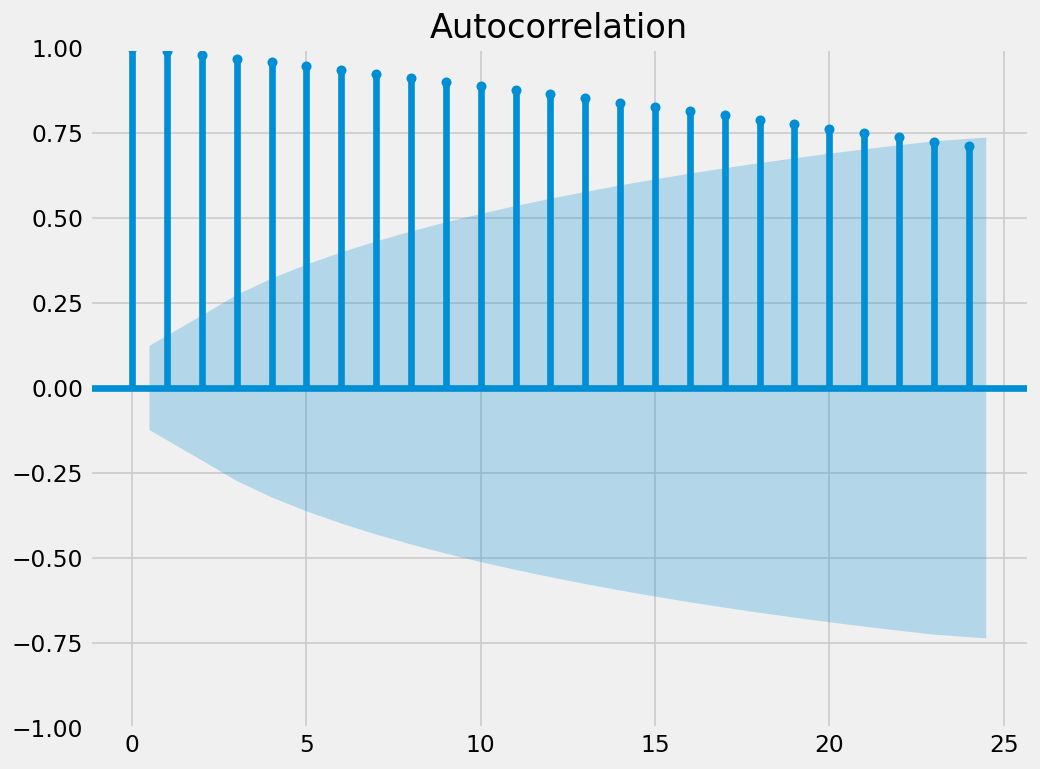

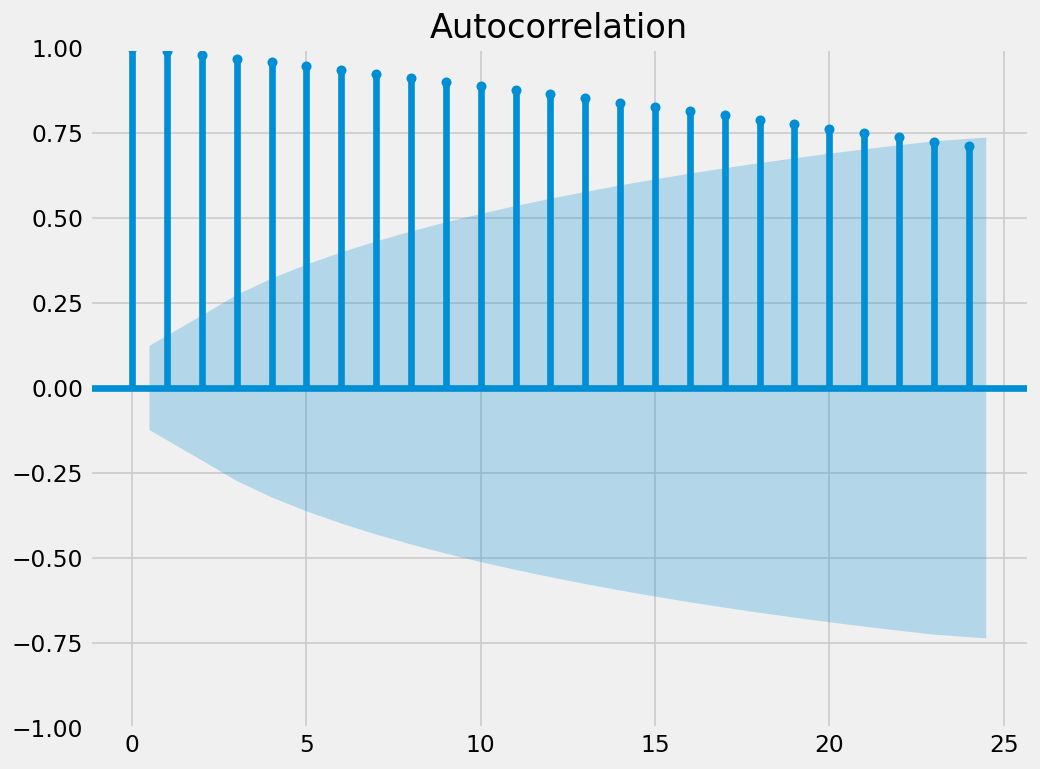

In [249]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df2['FullyPercent'].values)

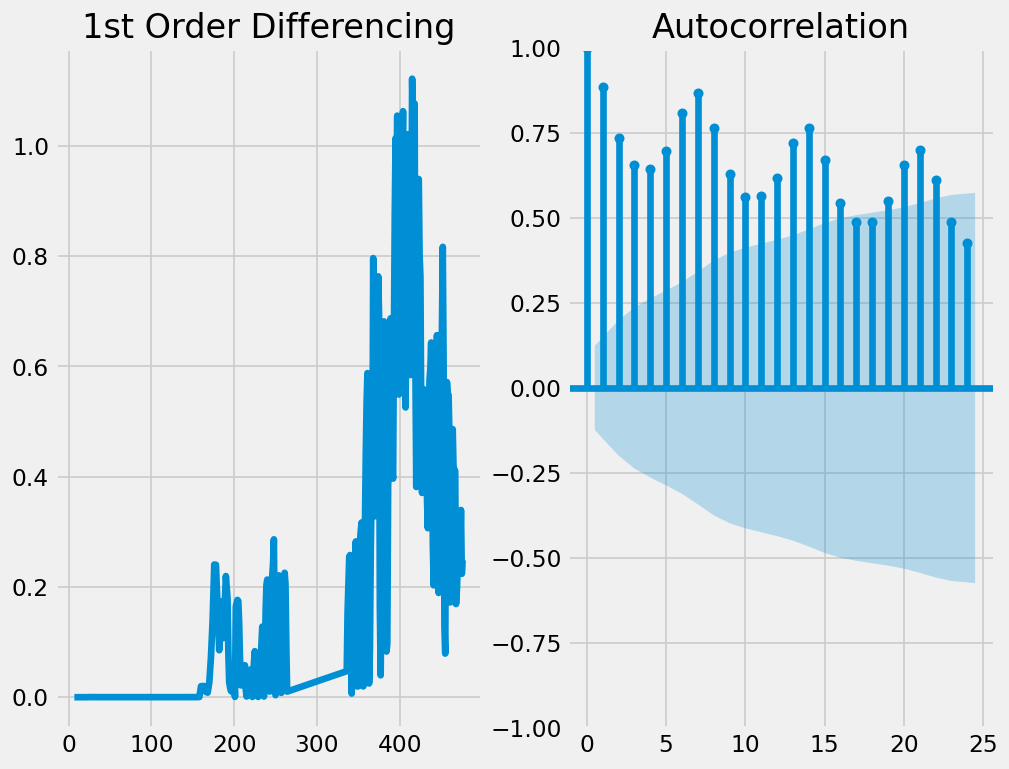

In [250]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df2['FullyPercent'].diff())

ax2 = f.add_subplot(122)
plot_acf(df2['FullyPercent'].diff().dropna(),ax = ax2)
plt.show()

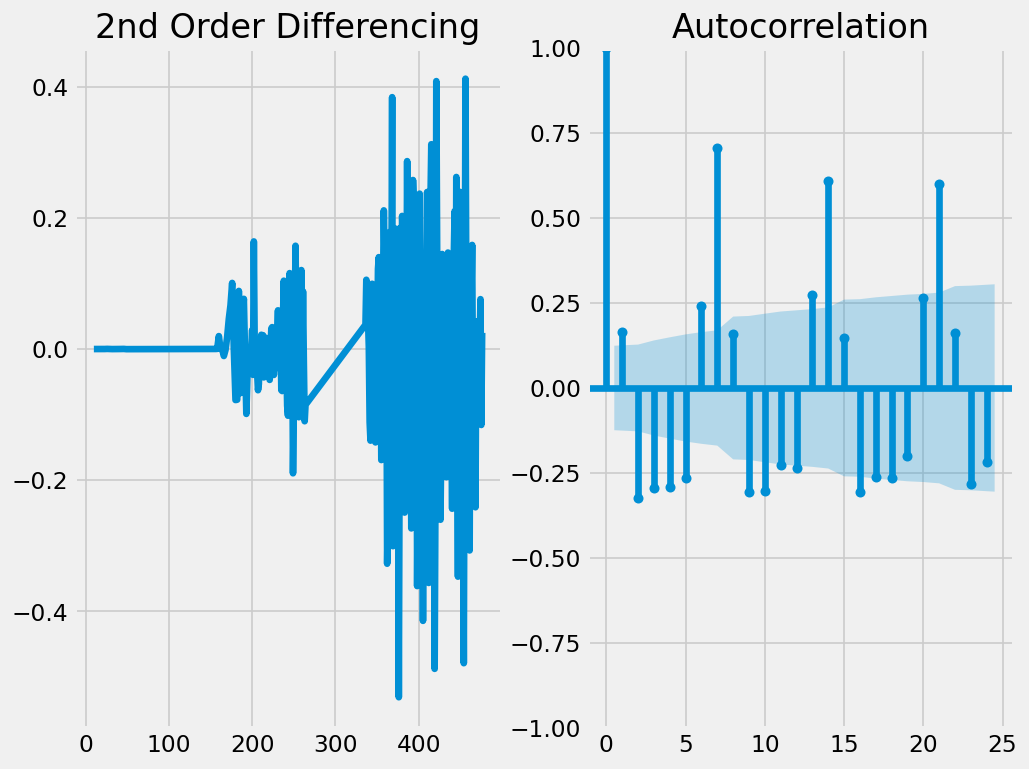

In [251]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df2['FullyPercent'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df2['FullyPercent'].diff().diff().dropna(),ax = ax2)
plt.show()

In [252]:
#pip install statsmodels

In [253]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df2['PartialPercent'].dropna())
print('p-value: ', result[1])

result = adfuller(df2['PartialPercent'].diff().dropna())
print('p-value: ', result[1])

result = adfuller(df2['PartialPercent'].diff().diff().dropna())
print('p-value: ', result[1])

p-value:  0.8658298322754108
p-value:  0.4063751639268286
p-value:  8.403115430161458e-07


In [254]:
from statsmodels.graphics.tsaplots import plot_pacf

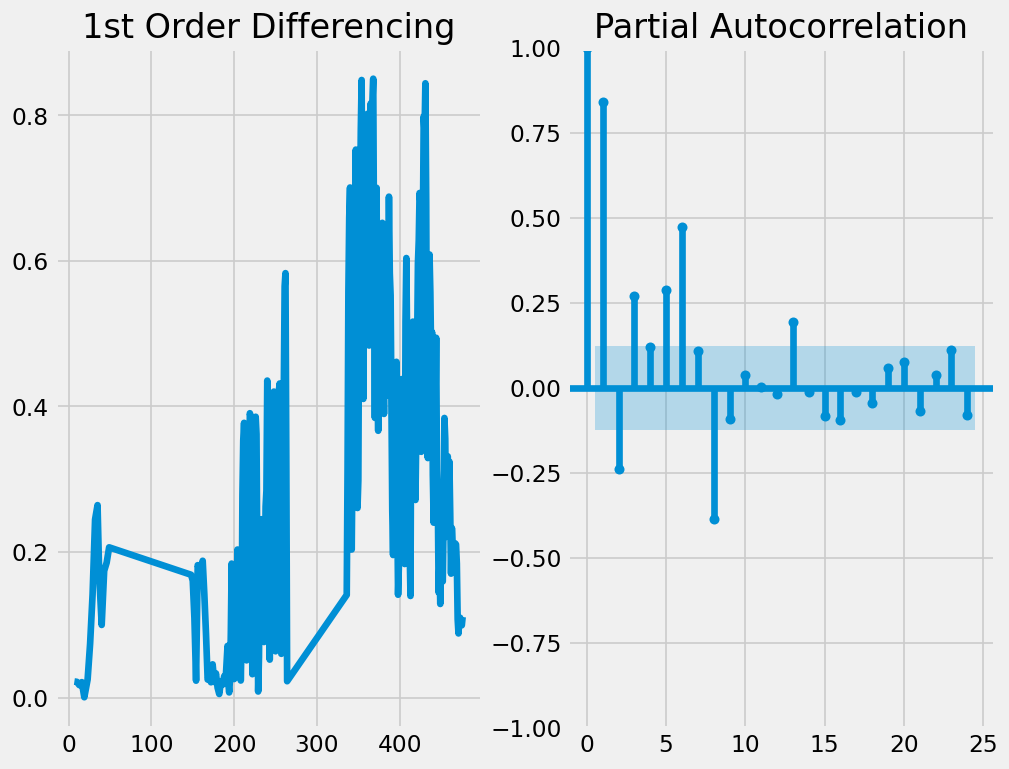

In [255]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(df2['PartialPercent'].diff())

ax2 = f.add_subplot(122)
plot_pacf(df2['PartialPercent'].diff().dropna(), ax=ax2)
plt.show()

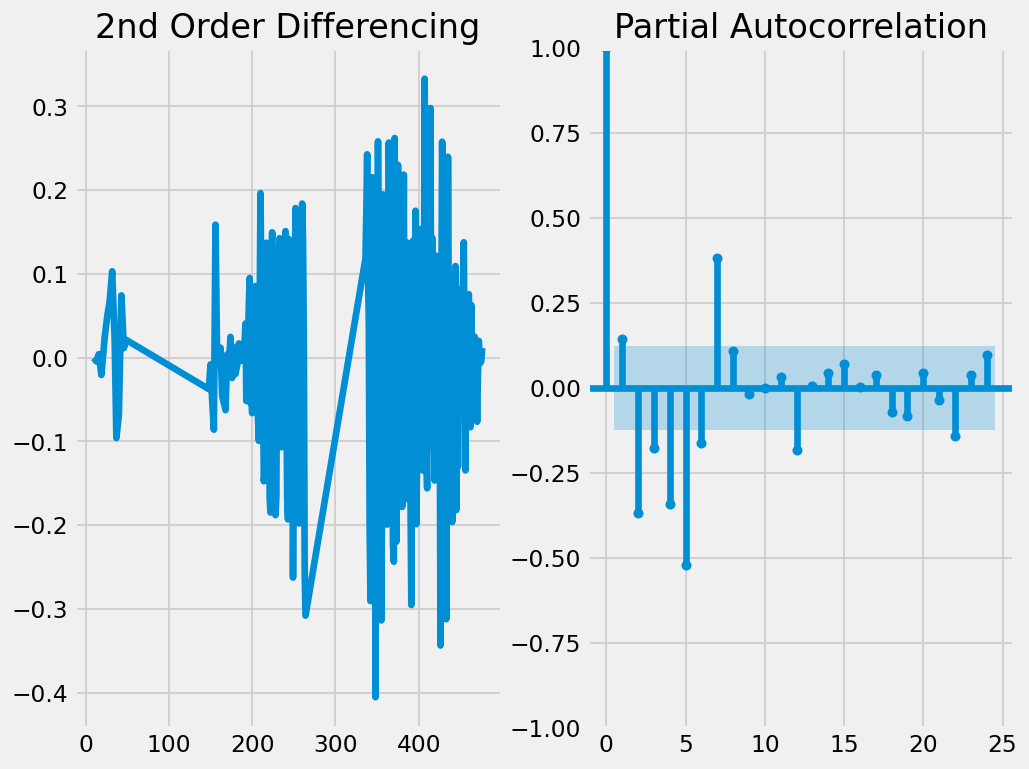

In [256]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("2nd Order Differencing")
ax1.plot(df2['PartialPercent'].diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(df2['PartialPercent'].diff().diff().dropna(), ax=ax2)
plt.show()

In [257]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df2['PartialPercent'], order=(1,1,2))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:         PartialPercent   No. Observations:                  251
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 201.943
Date:                Sun, 20 Aug 2023   AIC                           -395.887
Time:                        21:12:46   BIC                           -381.801
Sample:                             0   HQIC                          -390.218
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9930      0.006    168.851      0.000       0.982       1.005
ma.L1         -0.1285      0.059     -2.179      0.029      -0.244      -0.013
ma.L2         -0.5433      0.047    -11.554      0.0

/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [258]:
df3 = df2[['VaccinationDate', 'PartialPercent']]

In [259]:
df4 = df3.set_index('VaccinationDate')

In [260]:
df4

,PartialPercent
VaccinationDate,
2020-12-29 00:00:00+00:00,0.007961
2020-12-30 00:00:00+00:00,0.030176
2020-12-31 00:00:00+00:00,0.051891
2021-01-01 00:00:00+00:00,0.069063
2021-01-02 00:00:00+00:00,0.090340
...,...
2021-08-31 23:00:00+00:00,78.163242
2021-09-01 23:00:00+00:00,78.272963
2021-09-02 23:00:00+00:00,78.376266


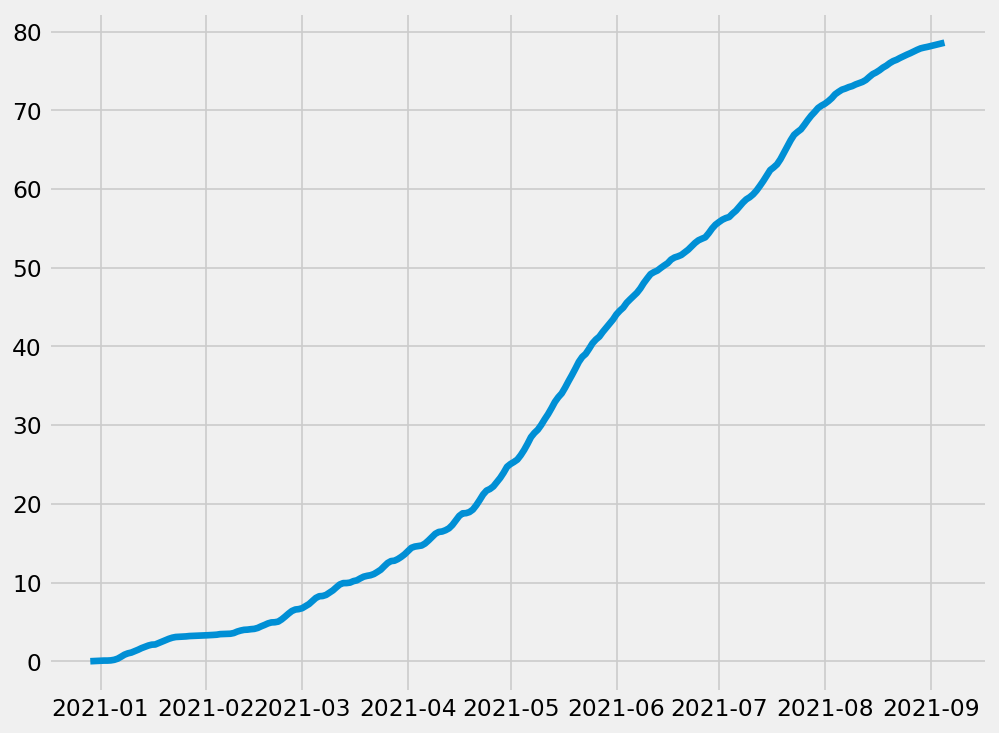

In [261]:
plt.plot(df4)

In [262]:
df6 = df2[['PartialPercent']]

In [263]:
df6.reset_index(inplace=True)

In [264]:
df6.shape

(251, 2)

<Axes: >

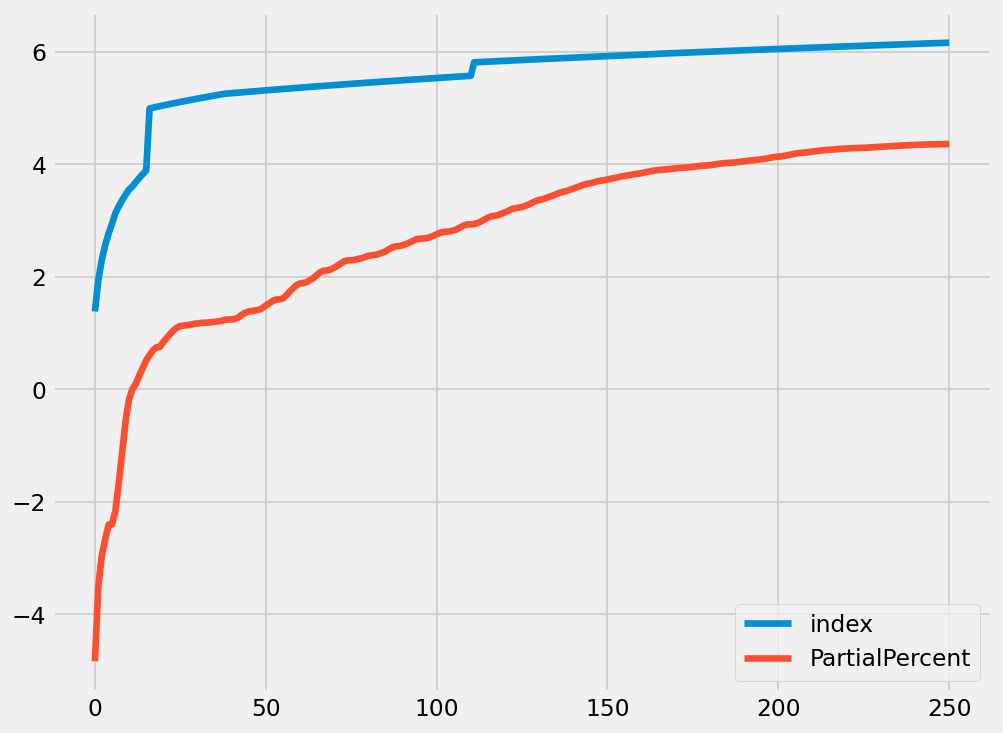

In [265]:
df7 = np.log(df6)
df7.plot()

In [266]:
df7.reset_index(inplace=True)

In [267]:
df8 = df7['PartialPercent']

In [268]:
df8

0     -4.833227
1     -3.500709
2     -2.958610
3     -2.672737
4     -2.404171
         ...   
246    4.358799
247    4.360202
248    4.361521
249    4.362789
250    4.364198
Name: PartialPercent, Length: 251, dtype: float64

In [269]:
len(df7)-30

221

In [270]:
#msk = (df7.index < len(df7)-30)
#df_train = df7[msk].copy()
#df_test = df[~msk].copy()

df_test= df8.iloc[-30:]
df_test

221    4.287185
222    4.289699
223    4.291461
224    4.294339
225    4.296529
226    4.298701
227    4.302045
228    4.307234
229    4.312012
230    4.314967
231    4.318698
232    4.323104
233    4.326394
234    4.330670
235    4.333999
236    4.336231
237    4.339277
238    4.342021
239    4.344660
240    4.347084
241    4.349824
242    4.352535
243    4.354904
244    4.356284
245    4.357415
246    4.358799
247    4.360202
248    4.361521
249    4.362789
250    4.364198
Name: PartialPercent, dtype: float64

In [271]:
df_train = df8.iloc[:221]
df_train

0     -4.833227
1     -3.500709
2     -2.958610
3     -2.672737
4     -2.404171
         ...   
216    4.264795
217    4.270192
218    4.277079
219    4.281404
220    4.285196
Name: PartialPercent, Length: 221, dtype: float64

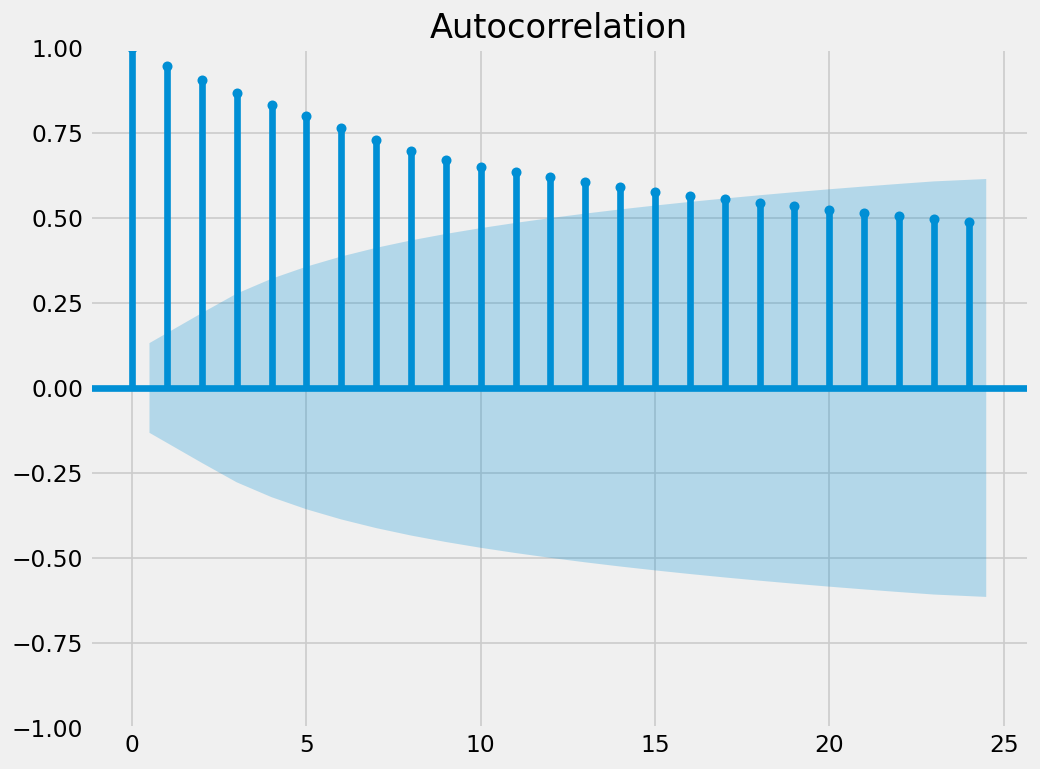

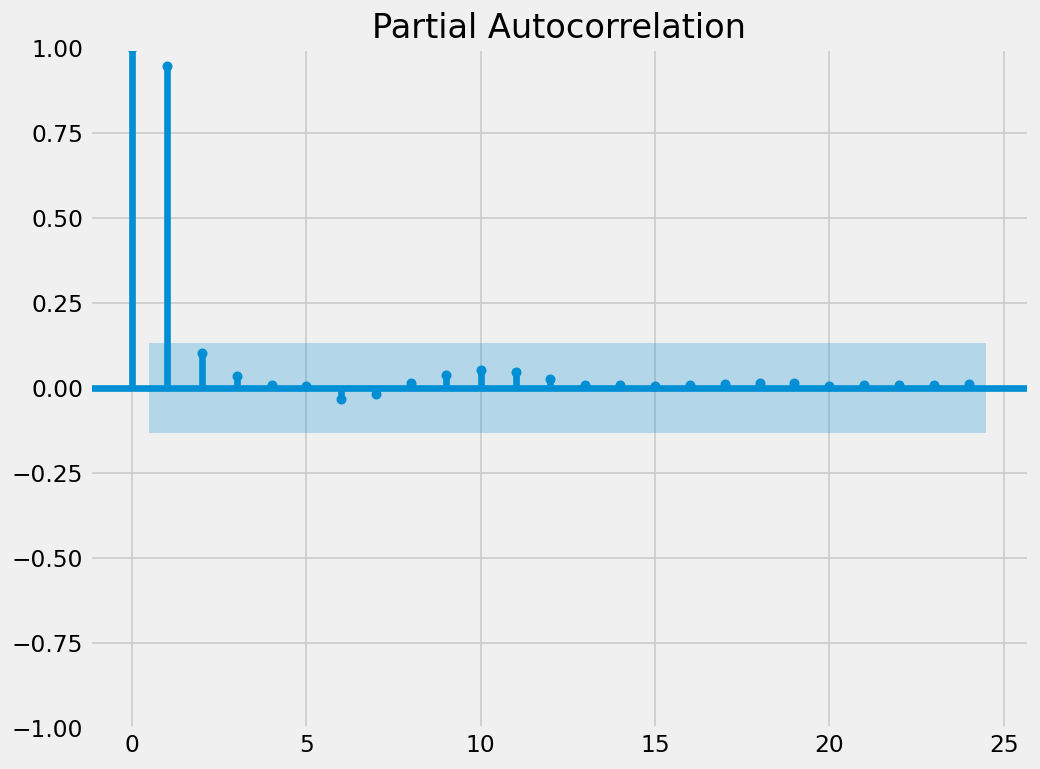

In [272]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [273]:

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.298524956621119


<Axes: >

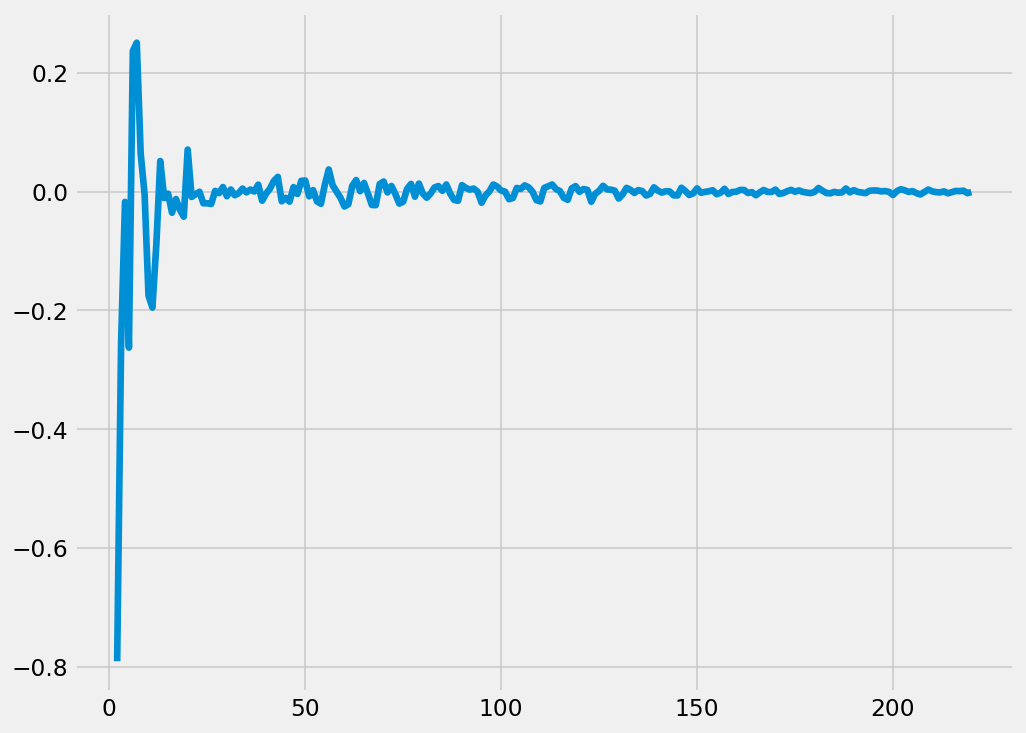

In [274]:
df_train_diff = df_train.diff().diff().dropna()
df_train_diff.plot()

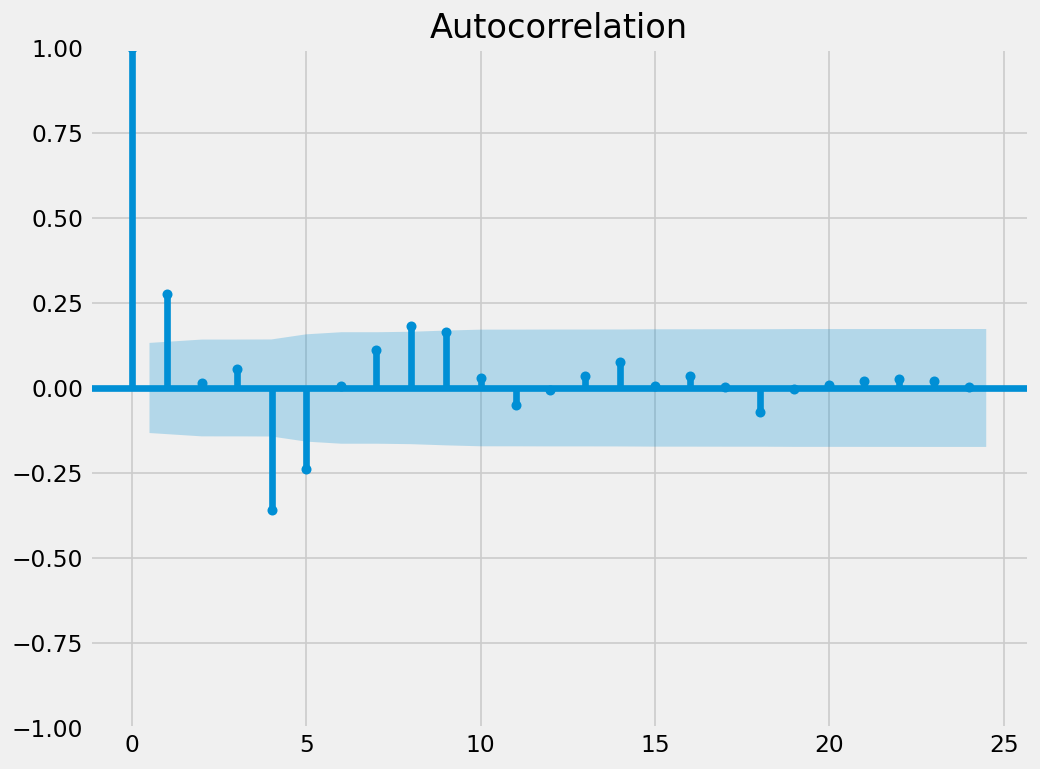

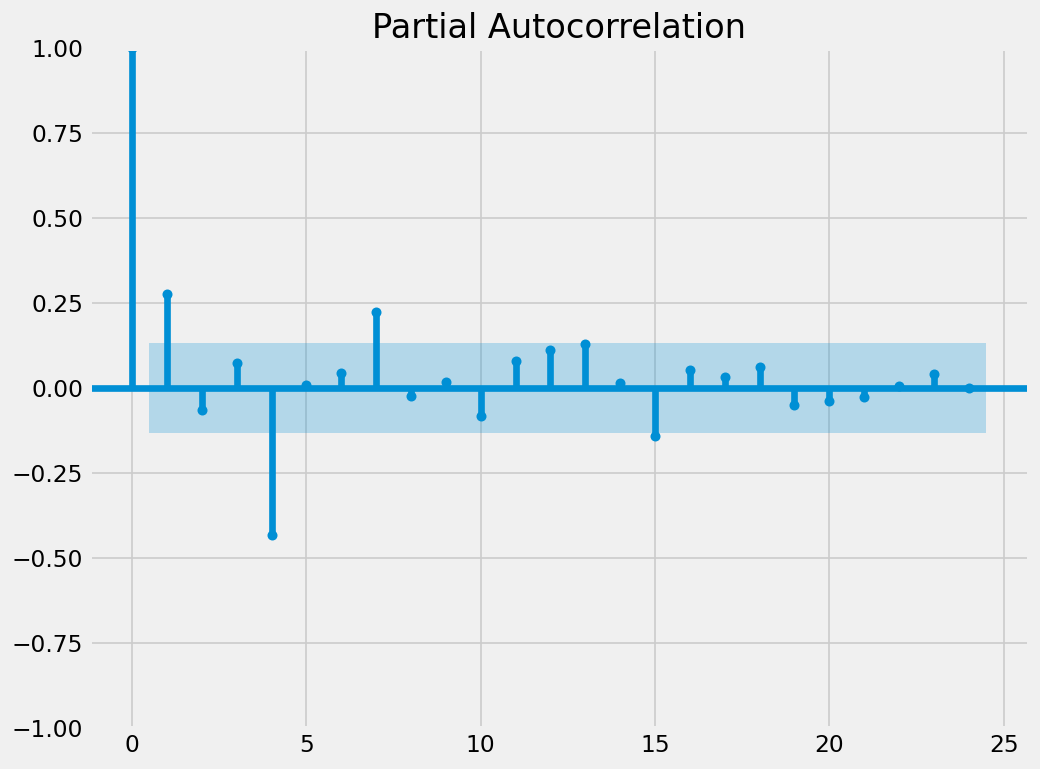

In [275]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [276]:

adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 1.0862684777756686e-16


In [277]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         PartialPercent   No. Observations:                  221
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 332.923
Date:                Sun, 20 Aug 2023   AIC                           -657.846
Time:                        21:12:52   BIC                           -644.272
Sample:                             0   HQIC                          -652.365
                                - 221                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9776      0.006    167.234      0.000       0.966       0.989
ma.L1          0.9079      0.123      7.391      0.000       0.667       1.149
ma.L2         -0.0576      0.025     -2.324      0.0

/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



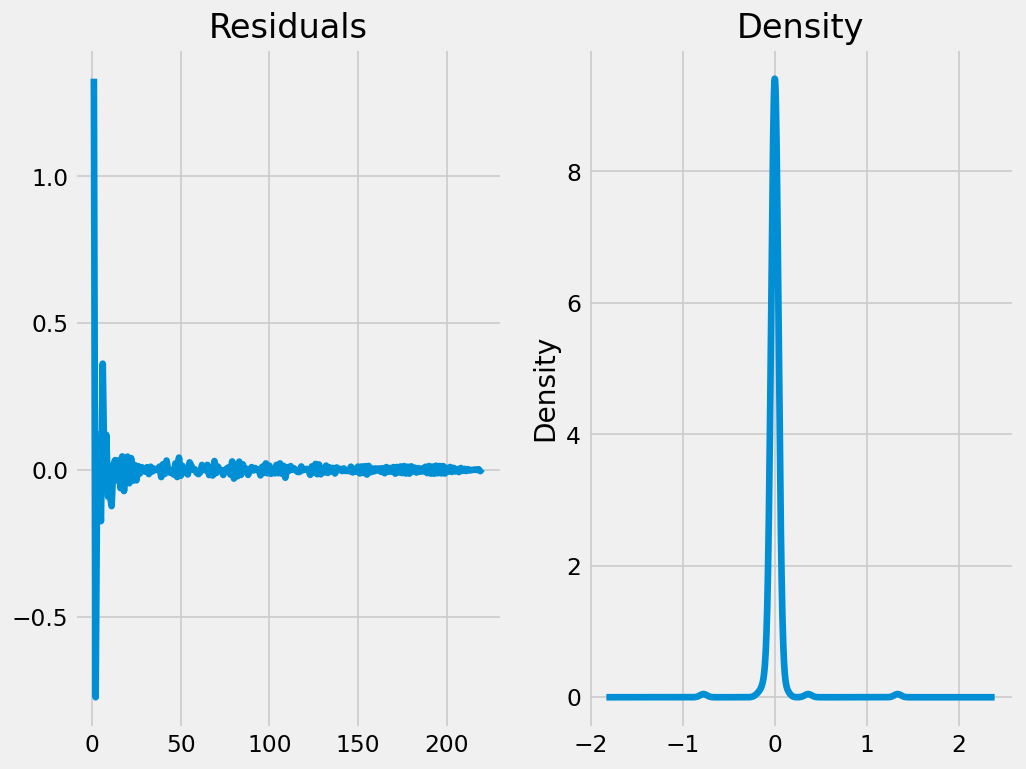

In [278]:

import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

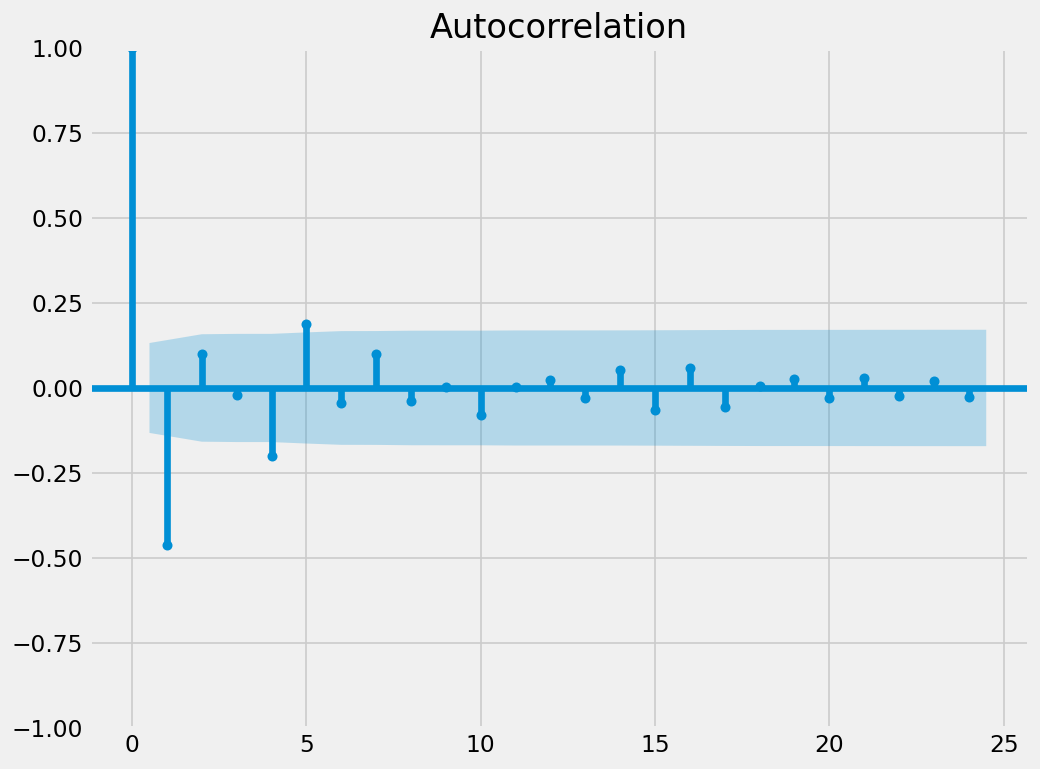

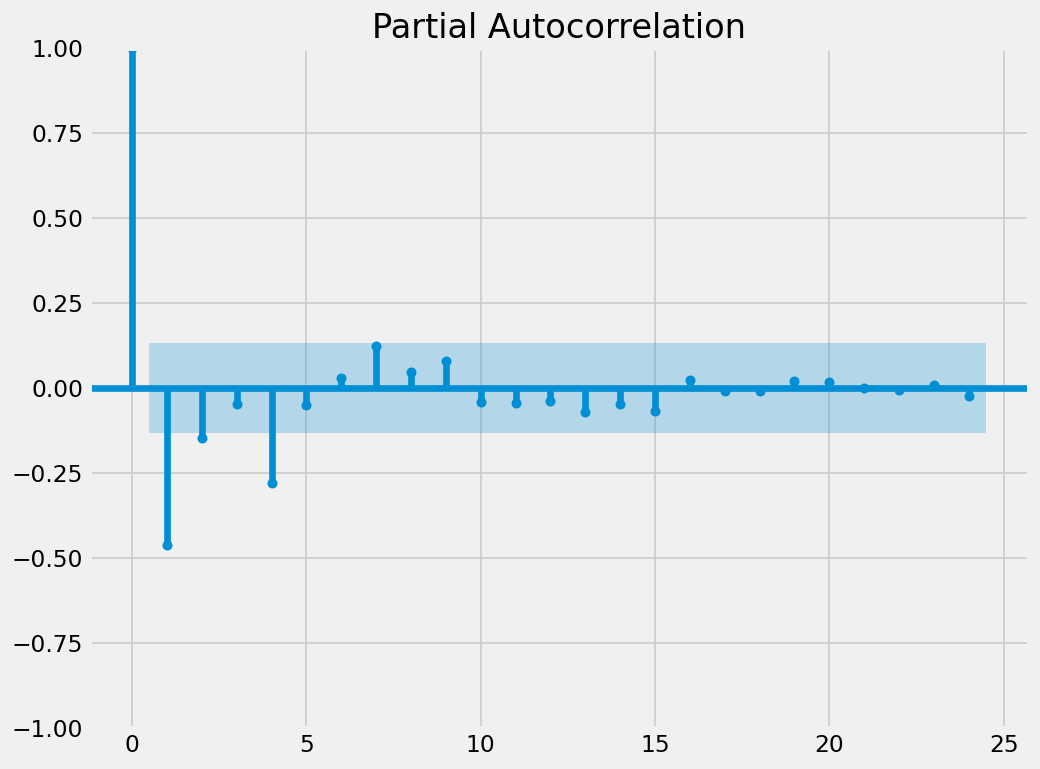

In [279]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

In [280]:
df_train

0     -4.833227
1     -3.500709
2     -2.958610
3     -2.672737
4     -2.404171
         ...   
216    4.264795
217    4.270192
218    4.277079
219    4.281404
220    4.285196
Name: PartialPercent, Length: 221, dtype: float64

In [281]:
df_test

221    4.287185
222    4.289699
223    4.291461
224    4.294339
225    4.296529
226    4.298701
227    4.302045
228    4.307234
229    4.312012
230    4.314967
231    4.318698
232    4.323104
233    4.326394
234    4.330670
235    4.333999
236    4.336231
237    4.339277
238    4.342021
239    4.344660
240    4.347084
241    4.349824
242    4.352535
243    4.354904
244    4.356284
245    4.357415
246    4.358799
247    4.360202
248    4.361521
249    4.362789
250    4.364198
Name: PartialPercent, dtype: float64

<Axes: >

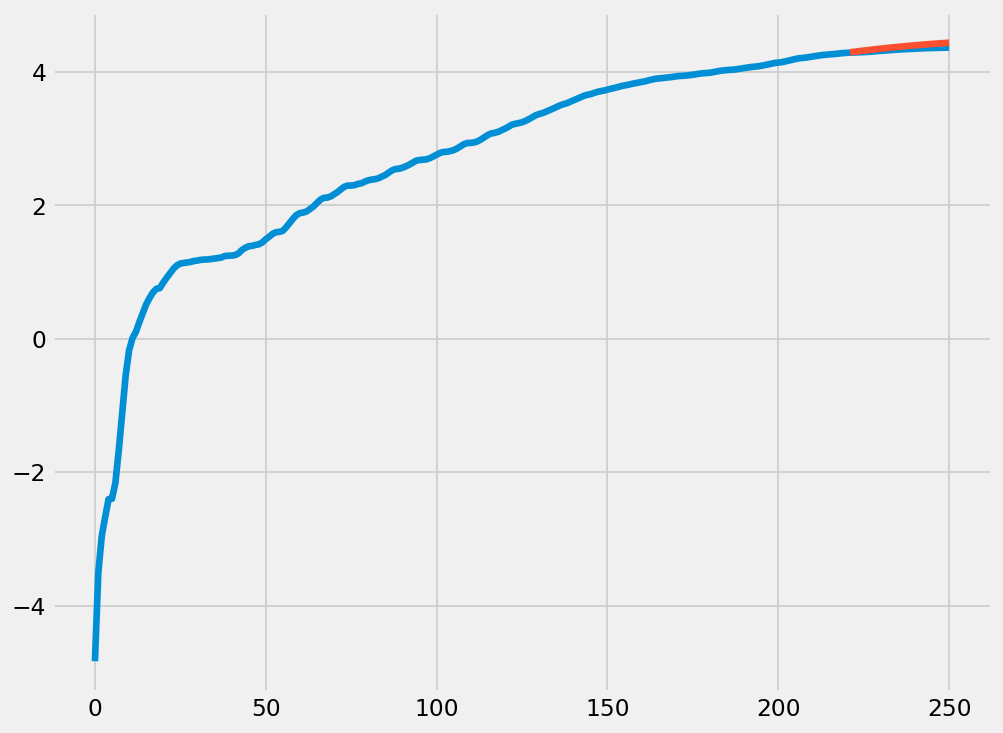

In [282]:

forecast_test = model_fit.forecast(len(df_test))
forecast_test

list(forecast_test)


df8.plot()
forecast_test.plot()
#df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)



#df.plot()

In [283]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.041770741989995544
mape - manual: 0.009622201117376236
rmse - manual: 0.04552995265414938


In [284]:
df8


0     -4.833227
1     -3.500709
2     -2.958610
3     -2.672737
4     -2.404171
         ...   
246    4.358799
247    4.360202
248    4.361521
249    4.362789
250    4.364198
Name: PartialPercent, Length: 251, dtype: float64

In [285]:
df9 = np.exp(df8)

In [286]:
df9

0       0.007961
1       0.030176
2       0.051891
3       0.069063
4       0.090340
         ...    
246    78.163242
247    78.272963
248    78.376266
249    78.475671
250    78.586351
Name: PartialPercent, Length: 251, dtype: float64

In [287]:
forecast_test_reverselog = np.exp(forecast_test)

In [288]:
forecast_test_reverselog

221    73.133440
222    73.627409
223    74.113552
224    74.591921
225    75.062572
226    75.525564
227    75.980958
228    76.428818
229    76.869209
230    77.302201
231    77.727864
232    78.146268
233    78.557489
234    78.961602
235    79.358683
236    79.748811
237    80.132064
238    80.508523
239    80.878269
240    81.241384
241    81.597952
242    81.948055
243    82.291777
244    82.629203
245    82.960417
246    83.285504
247    83.604549
248    83.917638
249    84.224856
250    84.526288
Name: predicted_mean, dtype: float64

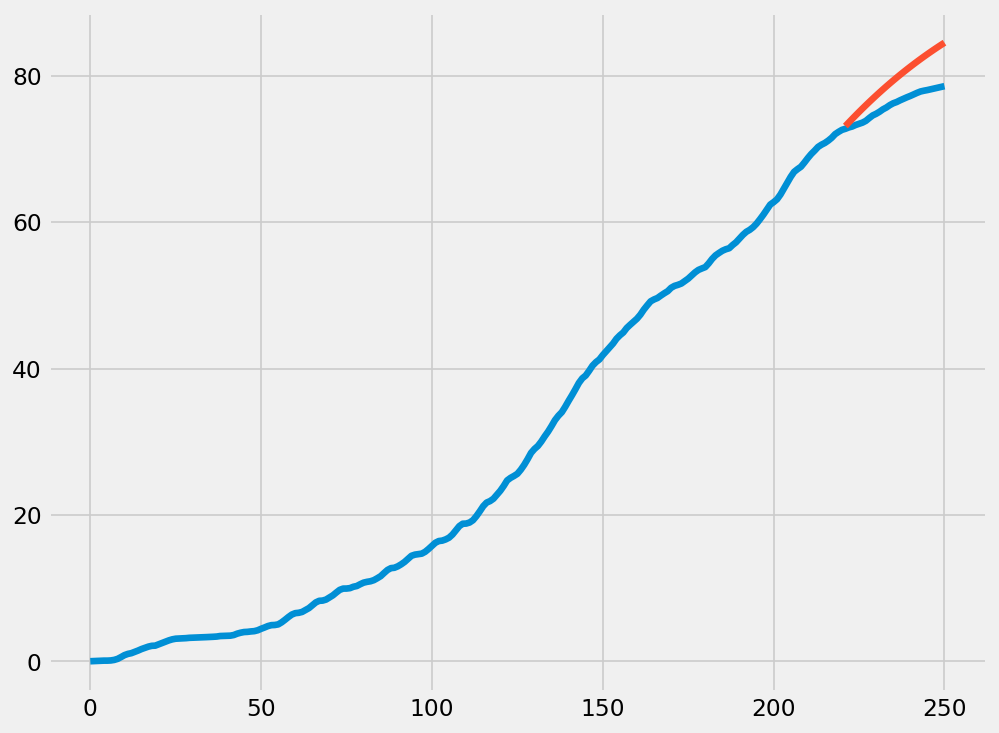

In [289]:
plt.plot(df9)
plt.plot(forecast_test_reverselog)

In [290]:
df4

,PartialPercent
VaccinationDate,
2020-12-29 00:00:00+00:00,0.007961
2020-12-30 00:00:00+00:00,0.030176
2020-12-31 00:00:00+00:00,0.051891
2021-01-01 00:00:00+00:00,0.069063
2021-01-02 00:00:00+00:00,0.090340
...,...
2021-08-31 23:00:00+00:00,78.163242
2021-09-01 23:00:00+00:00,78.272963
2021-09-02 23:00:00+00:00,78.376266


In [291]:
arima_2 = df4

In [292]:
sndf = arima_2['PartialPercent'].values
sndf

array([7.96079000e-03, 3.01759770e-02, 5.18910110e-02, 6.90629750e-02,
       9.03403740e-02, 9.08822080e-02, 1.15848244e-01, 1.89746045e-01,
       3.31393915e-01, 5.76115256e-01, 8.40592691e-01, 1.00899882e+00,
       1.10884212e+00, 1.28297919e+00, 1.46847392e+00, 1.67495429e+00,
       1.84375638e+00, 2.00438927e+00, 2.11377719e+00, 2.13705520e+00,
       2.31904886e+00, 2.49408203e+00, 2.67036559e+00, 2.85840277e+00,
       3.00009232e+00, 3.08764017e+00, 3.11243948e+00, 3.14113584e+00,
       3.16222568e+00, 3.20796896e+00, 3.22939224e+00, 3.26267334e+00,
       3.27636506e+00, 3.28136661e+00, 3.30318584e+00, 3.32094131e+00,
       3.35040874e+00, 3.38081395e+00, 3.45185671e+00, 3.47094593e+00,
       3.47809397e+00, 3.50303917e+00, 3.59221251e+00, 3.77635266e+00,
       3.90574675e+00, 3.99762927e+00, 4.02313714e+00, 4.07965458e+00,
       4.12085479e+00, 4.23889121e+00, 4.44234982e+00, 4.61905017e+00,
       4.81506898e+00, 4.93806527e+00, 4.96155168e+00, 5.04405630e+00,
      

In [293]:
val =sndf

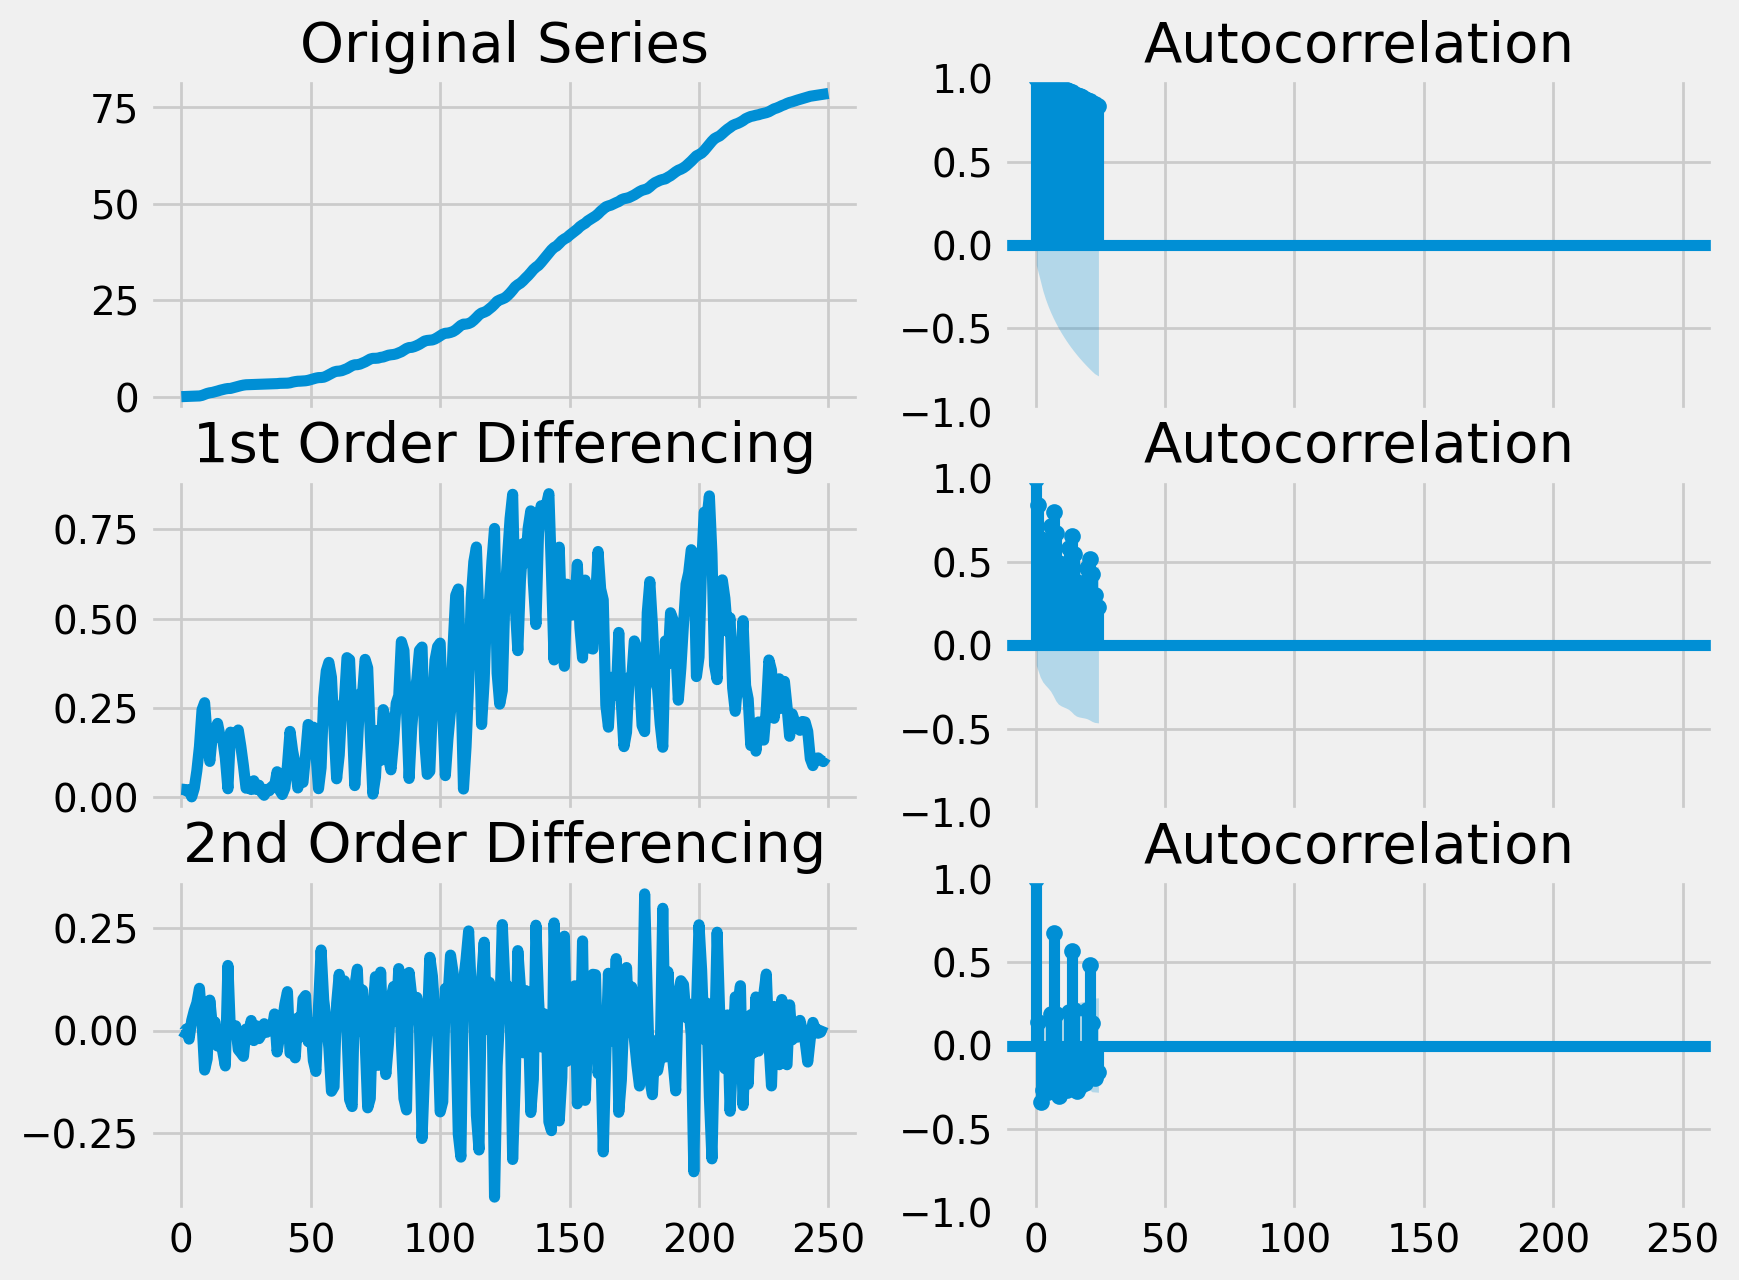

In [306]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':200})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
plot_acf(val, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(val), ax=axes[1, 1])
diffval = np.diff(val)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])

plt.show()

Text(0.5, 1.0, 'Original Series')

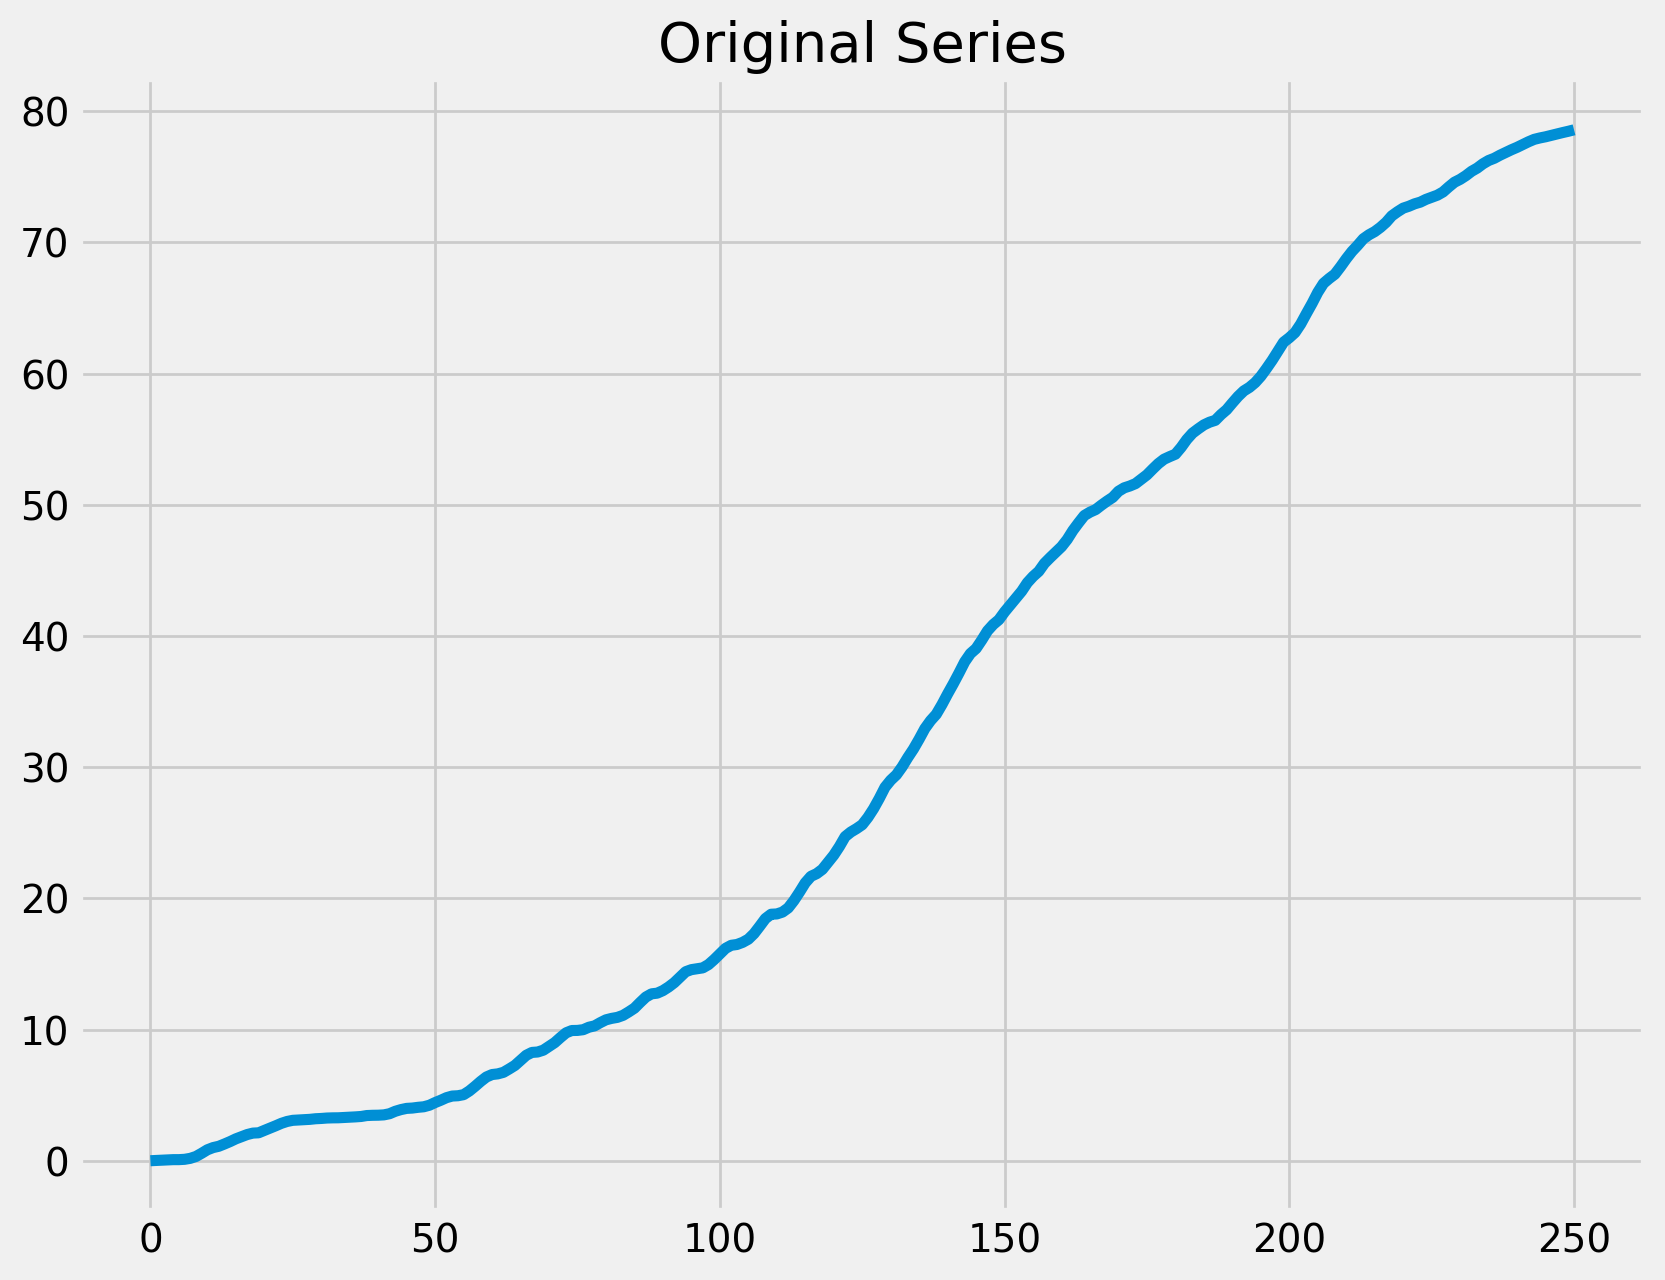

In [315]:

plt.plot(val); axes[0, 0].set_title('Original Series')
plt.title('Original Series')

Text(0.5, 1.0, '1st Order Differencing')

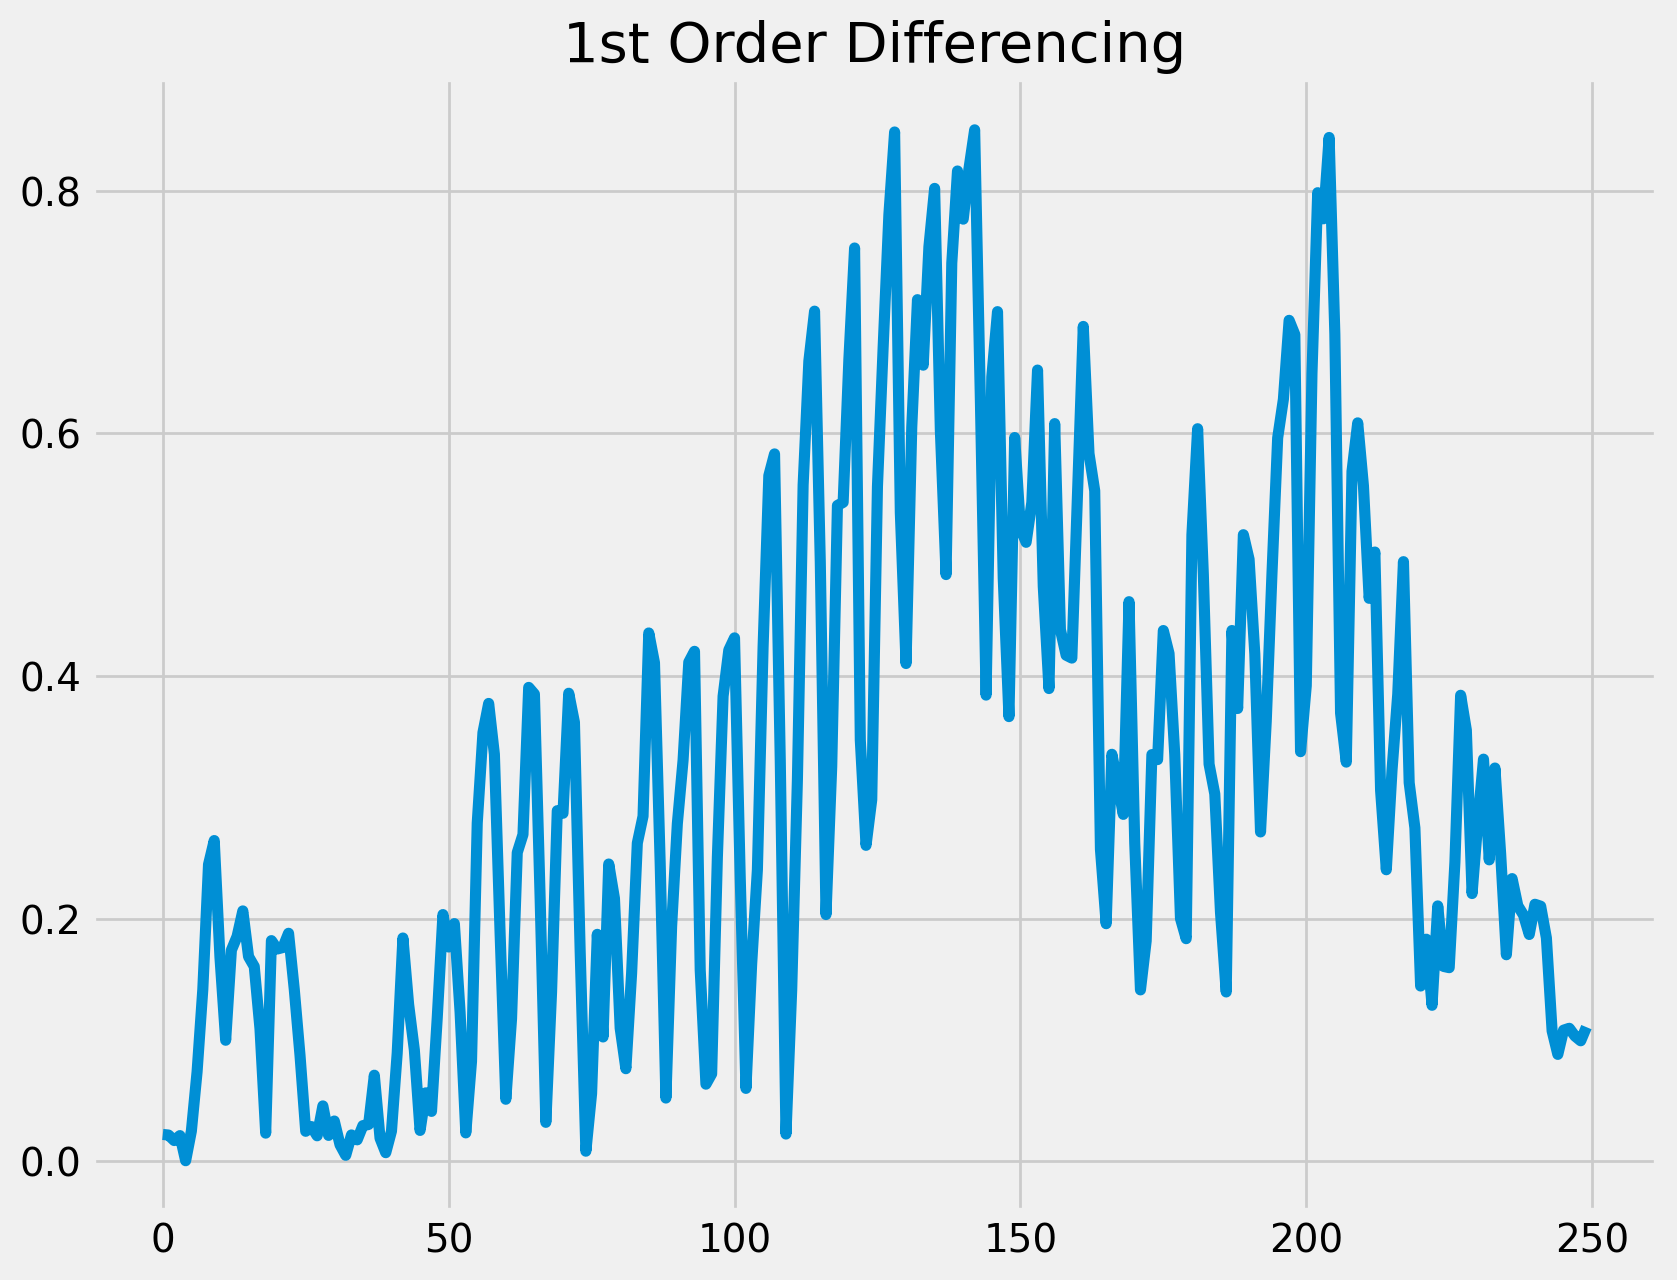

In [316]:
plt.plot(np.diff(val))
plt.title('1st Order Differencing')

Text(0.5, 1.0, '2nd Order Differencing')

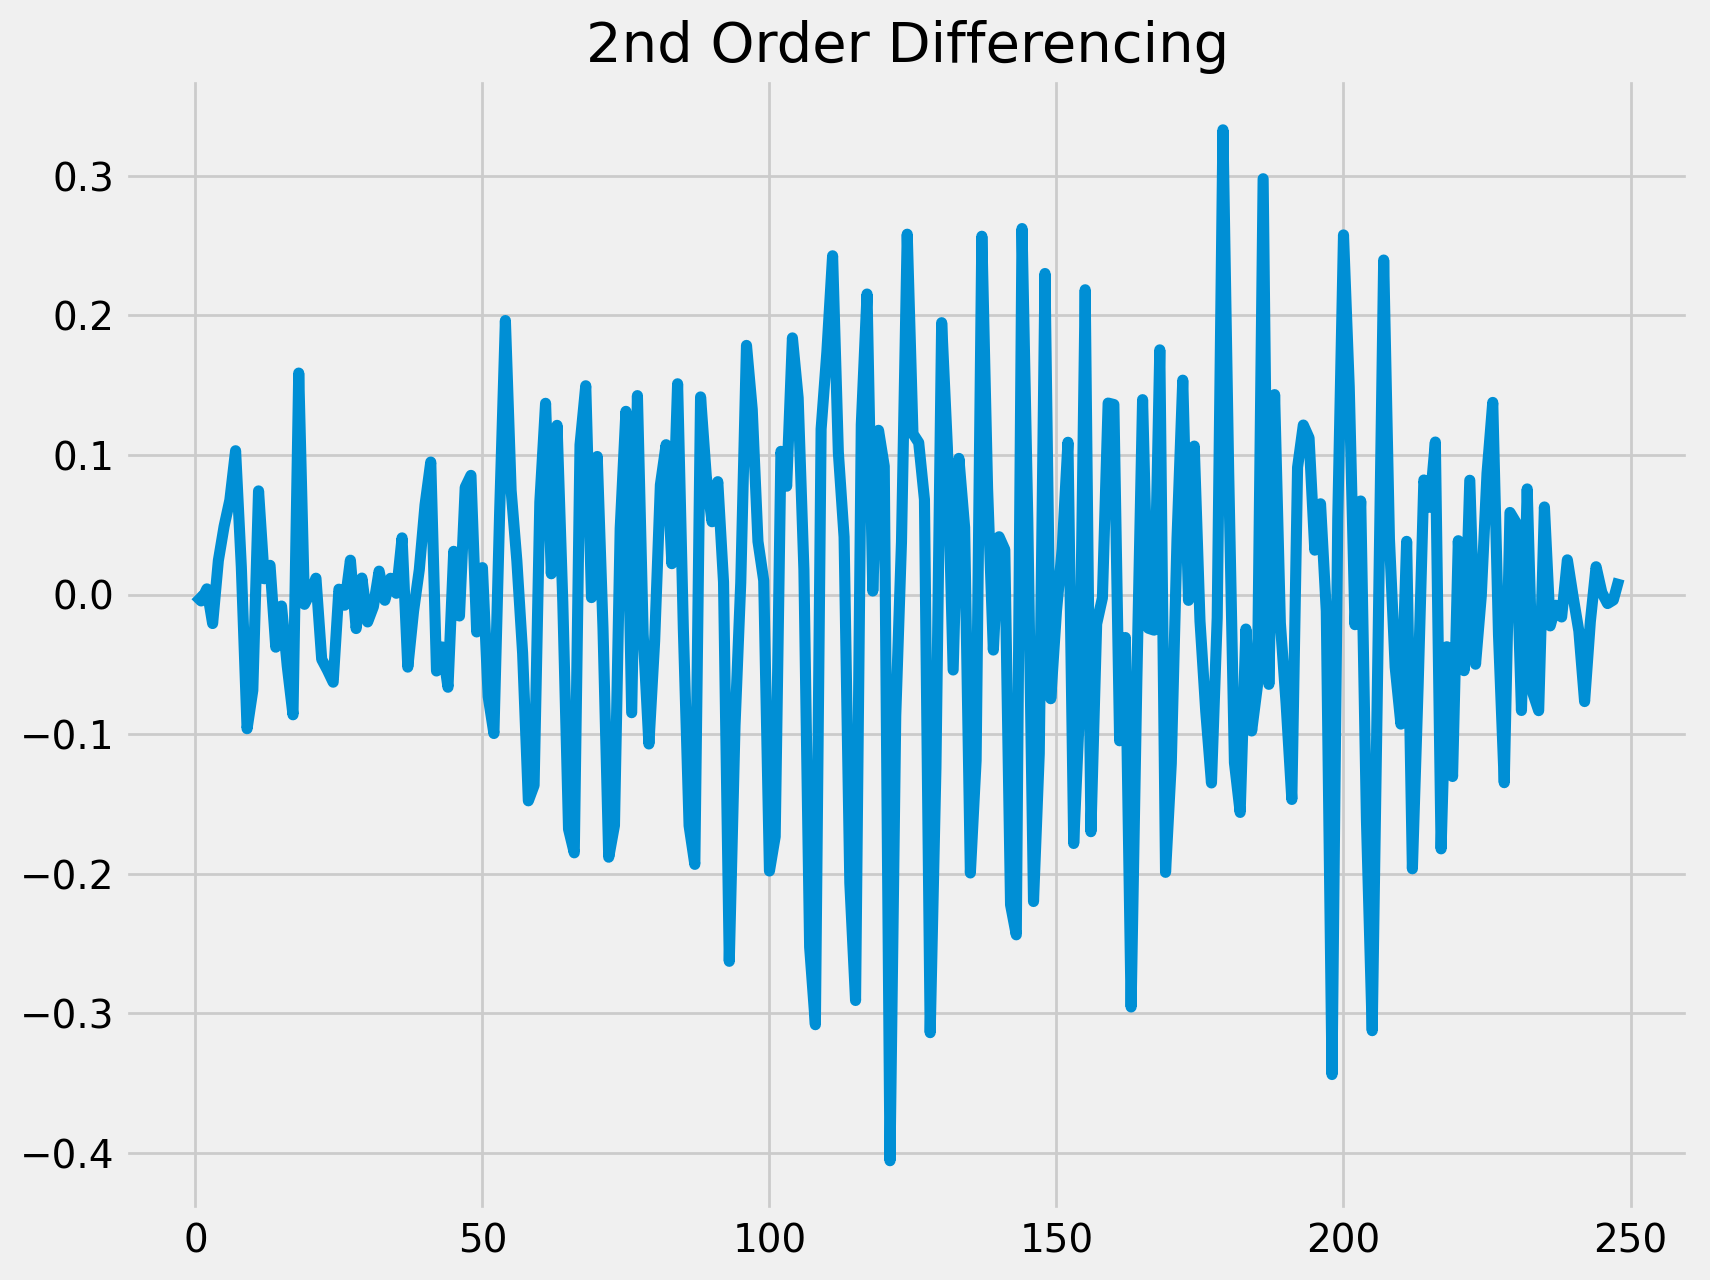

In [317]:
plt.plot(np.diff(diffval))
plt.title('2nd Order Differencing')

In [295]:
#pip install pmdarima

In [296]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(val, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-351.438, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-337.370, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-340.533, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-347.865, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-339.368, Time=0.01 sec


/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal

/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal

/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal

/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal

/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-419.272, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-374.208, Time=0.07 sec


/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-419.395, Time=0.27 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-380.092, Time=0.09 sec


/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-416.029, Time=0.37 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-435.838, Time=0.48 sec


/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-458.328, Time=0.37 sec


/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-408.031, Time=0.32 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-454.126, Time=0.37 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-461.586, Time=0.22 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-410.031, Time=0.11 sec


/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-456.962, Time=0.21 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-457.115, Time=0.26 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-404.720, Time=0.17 sec


/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal

/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-418.442, Time=0.19 sec

Best model:  ARIMA(2,2,3)(0,0,0)[0]          
Total fit time: 4.116 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(2, 2, 3)   Log Likelihood                 236.793
Date:                Sun, 20 Aug 2023   AIC                           -461.586
Time:                        21:13:19   BIC                           -440.481
Sample:                             0   HQIC                          -453.091
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2329      0.017     72.363      0.000       1.200 

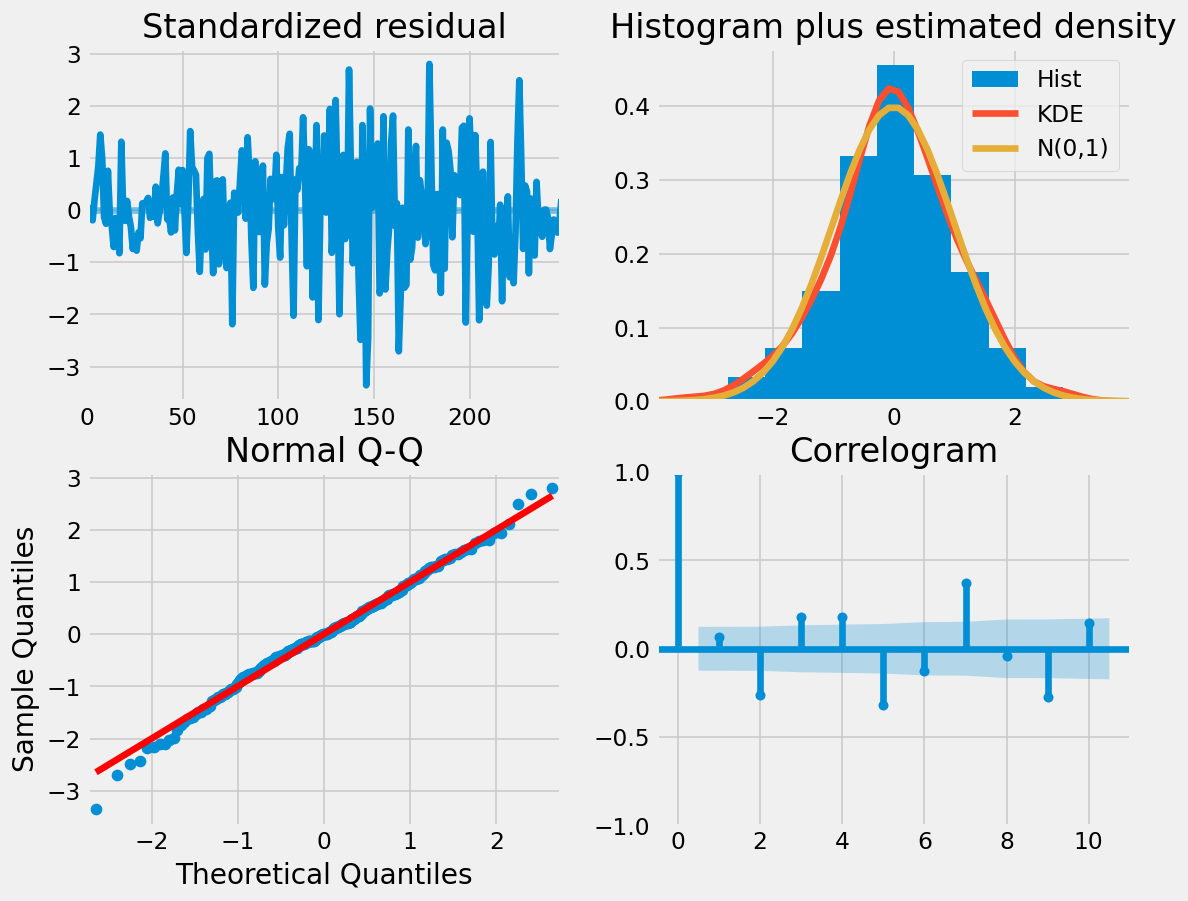

In [297]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


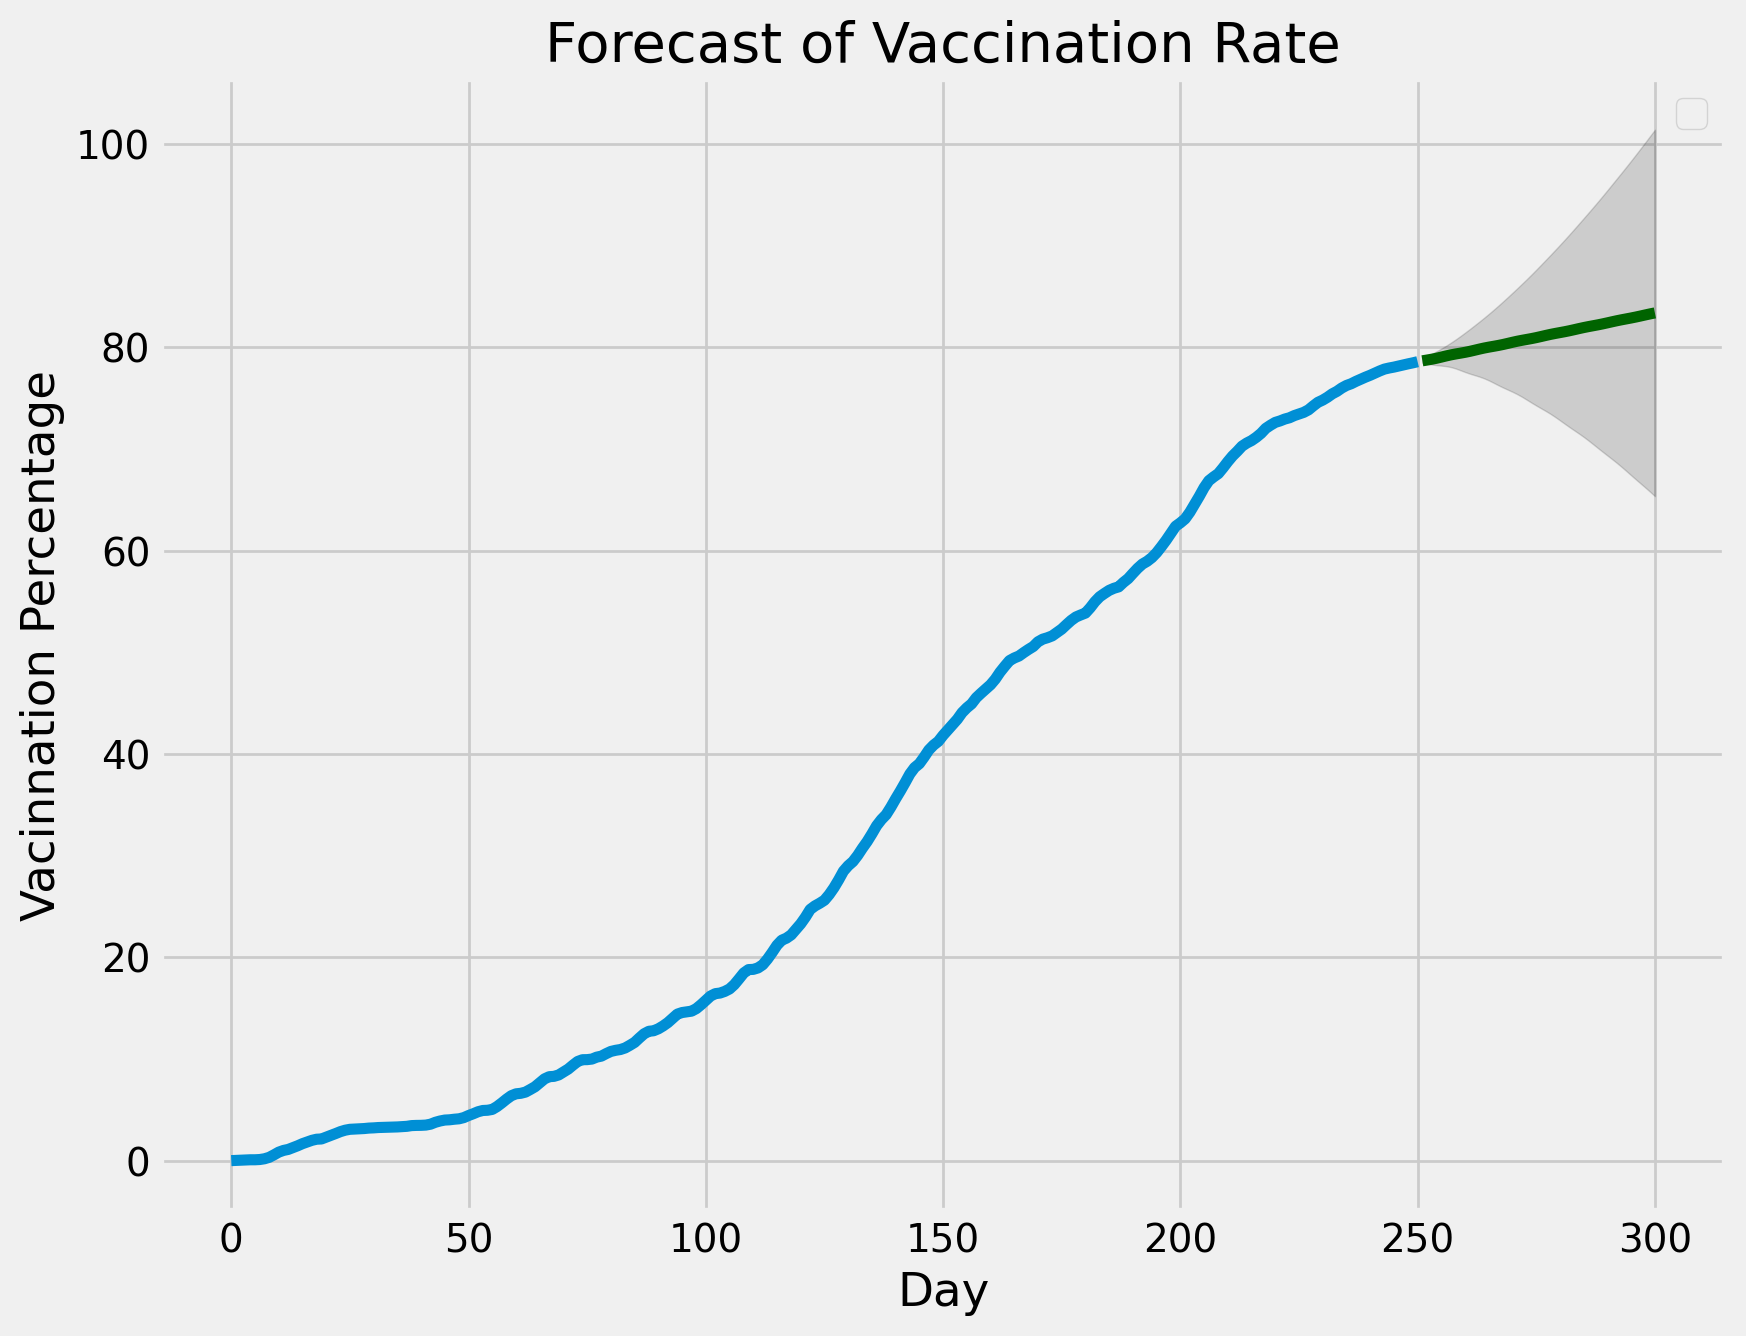

In [320]:
# Forecast
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(val), len(val)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(val)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='k', alpha=.15)
plt.title("Forecast of Vaccination Rate")
plt.ylabel('Vaccination Percentage')
plt.ylabel('Vacinnation Percentage')
plt.xlabel('Day')
plt.legend()
plt.show()